### 10th European Summer School in Financial Mathematics
<p>

### Dresden, September 1, 2017

<p>
<p>

### Rough volatility

<p>
#### Lecture 3: Computation and calibration





Jim Gatheral   
Department of Mathematics     

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3> 

$$
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\ben}{\begin{enumerate}}
\newcommand{\een}{\end{enumerate}}
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\bv}{\begin{verbatim}}
\newcommand{\ev}{\end{verbatim}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\sigl}{\sigma_L}
\newcommand{\BS}{\rm BS}
\newcommand{\vix}{\text{VIX}}
\newcommand{\p}{\partial}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\mt}{\mathbf{t}}
\newcommand{\mS}{\mathbf{S}}
\newcommand{\mF}{\mathbb{F}}
\newcommand{\tC}{\widetilde{C}}
\newcommand{\hC}{\widehat{C}}
\newcommand{\cE}{\mathcal{E}}
\newcommand{\tH}{\widetilde{H}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cS}{\mathcal{S}}
\newcommand{\cR}{\mathcal{R}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cv}{\mathcal{v}}
\newcommand{\cg}{\mathcal{g}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\dt}{\Delta t}
\newcommand{\tr}{{\rm tr}}
\newcommand{\dm}{{\diamond}}
\newcommand{\ui}{{\textrm{i}}}
\newcommand{\sgn}{\mathrm{sign}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$




### Outline of Lecture 3


* The Hybrid BSS Scheme


* Guessing rough Bergomi parameters

    * Iterating $\xi_t(T)$ to match ATM volatilities


* Exponentiation of conditional expectations


* Leverage swap computations


* Calibration of parameters

### The rough Bergomi (rBergomi) model

First recall the rough Bergomi model from Lecture 2 which can be written as

$$
\beas
\frac{dS_t}{S_t} &=& \sqrt{v_t}\,\left\{  \rho\,dW_t + \sqrt{1-\rho^2}\,dW^\perp_t \right\}\\
v_u &=& \xi_t(u) \,\cE\left(\tilde \eta\,\int_t^u\,\frac{dW_s}{(t-s)^\gamma} \right)
\eeas
$$

with $\gamma = \frac 12 - H$ and $\tilde \eta = \eta\,\sqrt{2\,H}$.

- The forward variances $\xi_t(u) =  \eef{v_u}$ are (at least in principle) tradable and  observed in the market.

- We remain in the pricing measure throughout.



### Hybrid simulation of BSS processes

  
-  In <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>3<span>]</span></a></sup>, we simulate the rBergomi model by generating paths of $\tilde W$ and $Z$ with the correct joint marginals using Cholesky decomposition.
    - This is very slow!  Complexity is $\cO(n^3)$.
 

- The Rough Bergomi variance process is a special case of a Brownian Semistationary (BSS) process.


- <span>[Bennedsen, Lunde and Pakkanen]<sup id="cite_ref-BLP" class="reference"><a href="#cite_note-BLP"><span>[</span>4<span>]</span></a></sup> show how to simulate such processes more efficiently.

- Recall that we wish to simulate for each $u \in (t,T)$
$$
v_u = \xi_t(u) \,\cE\left( \tilde \eta\,\int_t^u\,\frac{dW_s}{(u-s)^\gamma} \right).
$$


- The idea is to simulate each step in the integral using the Euler scheme except for steps close to the singularity.




We proceed as follows.  Let $\Delta = \frac{T-t}n$ and evaluate at $u = j \Delta$.  Then

$$
\beas
\tilde W_j:=\int_t^u\,\frac{dW_s}{(u-s)^\gamma} 
&=&\sum_{k=1}^{j}\, \int_{(k-1) \Delta}^{k \Delta}\,\frac{dW_s}{(j \Delta -s)^\gamma}\\ 
&\approx&
\sum_{k=1}^{\kappa}\, \int_{(k-1)\Delta}^{k \Delta}\,\frac{dW_s}{s^\gamma} + \sum_{k=(\kappa+1)}^j\,\frac{1}{{b_{j-k}}^\gamma\,\Delta^\gamma}\, \int_{(k-1) \Delta}^{k \Delta}\,dW_s\\
&=&
\sum_{k=1}^{\kappa}\, \int_{(k-1)\Delta}^{k \Delta}\,\frac{dW_s}{s^\gamma} + \sum_{k=(\kappa+1)}^j\,\frac{1}{{b_{j-k}}^\gamma}\, W_k\,\Delta^H
\eeas
$$

where
the $W_k$ are iid $N(0,1)$ random variables and the 
$
b_k  
$
are chosen to satisfy

$$
\int_{{k-1}}^{k}\,\frac{ds}{s^\gamma} = \frac{1}{b_k^\gamma}.
$$

- That is, we simulate the first $\kappa$ terms exactly and the remaining $n-\kappa$ terms using the Euler scheme.
    - The choice $\kappa =1$ works well in practice.
    - The choice $\kappa = 0$ corresponds to the Euler scheme which as expected performs poorly.

Note that the

$$
\int_{(k-1)\Delta}^{k \Delta}\,\frac{dW_s}{s^\gamma} = \Delta ^H\,\int_{(k-1)}^{k}\,\frac{dW_s}{s^\gamma} 
$$

are Gaussian random variables.  Setting $\kappa =1$, we therefore need two vectors of $n$ random variables $W_k$ and $\hat W_k$ with covariance structure

$$
\beas
\var[\hat W_k] &=& \int_0^1\,\frac{ds}{s^{2 \gamma}} = \frac{1}{2 H}\\
\cov[\hat W_k, W_k] &=& \int_0^1\,\frac{ds}{s^{\gamma}} = \frac{1}{H + \frac 12}.
\eeas
$$

We achieve this by defining

$$
\hat W = \frac{1}{\sqrt{2 H}}\,\left\{ \rho_H\,W + \sqrt{1-\rho_H^2}\,W^\perp  \right\}
$$

with 

$$
\rho_H = \frac{\sqrt{2\,H}}{H+\frac 12}.
$$

At the $j$th timestep, we choose $\tilde W_j$ to resolve the singularity and use Euler for the remaining steps:

$$
\tilde W_j = \left\{\hat W_j + \sum_{k = 1}^{j-1}\,\frac{1}{{b_{j-k}}^\gamma}\,W_{k} \right\} \,\Delta^H.
$$

Finally, we note that the second term is a discrete convolution.

- In R, we implement this using `convolve` which in turn uses FFT.  
- Complexity is thus $\cO(n \log n)$.


### Guessing rough Bergomi model parameters

  
-  The rBergomi model has only three parameters: $H$, $\eta$ and $\rho$.
-  If we had a fast enough simulation, we could just iterate on these parameters to find the best fit to observed option prices.  But we don't.

-  These parameters have very direct interpretations:
  
    - $H$ controls the decay of ATM skew $\psi(\tau)$ for very short expirations 
    -  The product $\rho\,\eta$ sets the level of the ATM skew for longer expirations.  
    -  Keeping  $\rho\,\eta$ constant but decreasing $\rho$ (so as to make it more negative) pushes the minimum of each smile towards higher strikes. 
 

-  So we can guess parameters in practice.
 
 
-  As we will see, even without proper calibration (*i.e.* just guessing parameters), rBergomi model fits to the volatility surface are amazingly good.

 

In [1]:
unzip(zipfile="DRV3.zip")
setwd("./DRV3")
source("BlackScholes.R")
source("FukasawaRobust.R")
source("hestonLeverage.R")
source("hybridSimulation.R")
source("plotIvolsMC.R")
source("plotNormalizedSmiles.R")

### One day in history

- We focus on April 24, 2017.

- We will show guessing rough Bergomi parameters works out in practice.
    - First estimate $H$ using skews normalized by ATM vols.  This removes any problem due to misestimation of time-to-expiration (trading time).
    - Then estimate the product $\rho \,\eta$ by matching skews.
    - Finally fix $\rho$ by look at one particular smile.

In [2]:
ivolData <- read.csv("spxVols20170424.csv")

In [3]:
head(ivolData)

X,Expiry,Texp,Strike,Bid,Ask,Fwd,CallMid,PV
1,4/26/17,0.002737851,2275,0.3470891,0.3745447,2387.867,112.94255,0.998
2,4/26/17,0.002737851,2290,0.3045018,0.3291942,2387.867,97.94255,0.998
3,4/26/17,0.002737851,2295,0.2902495,0.3140047,2387.867,92.94255,0.998
4,4/26/17,0.002737851,2300,0.2759625,0.2987715,2387.867,87.94255,0.998
5,4/26/17,0.002737851,2305,0.2616363,0.2985407,2387.867,82.96760,0.998
6,4/26/17,0.002737851,2310,0.2472659,0.2825590,2387.867,77.96760,0.998


In [4]:
library(repr)
options(repr.plot.width=14,repr.plot.height=8)

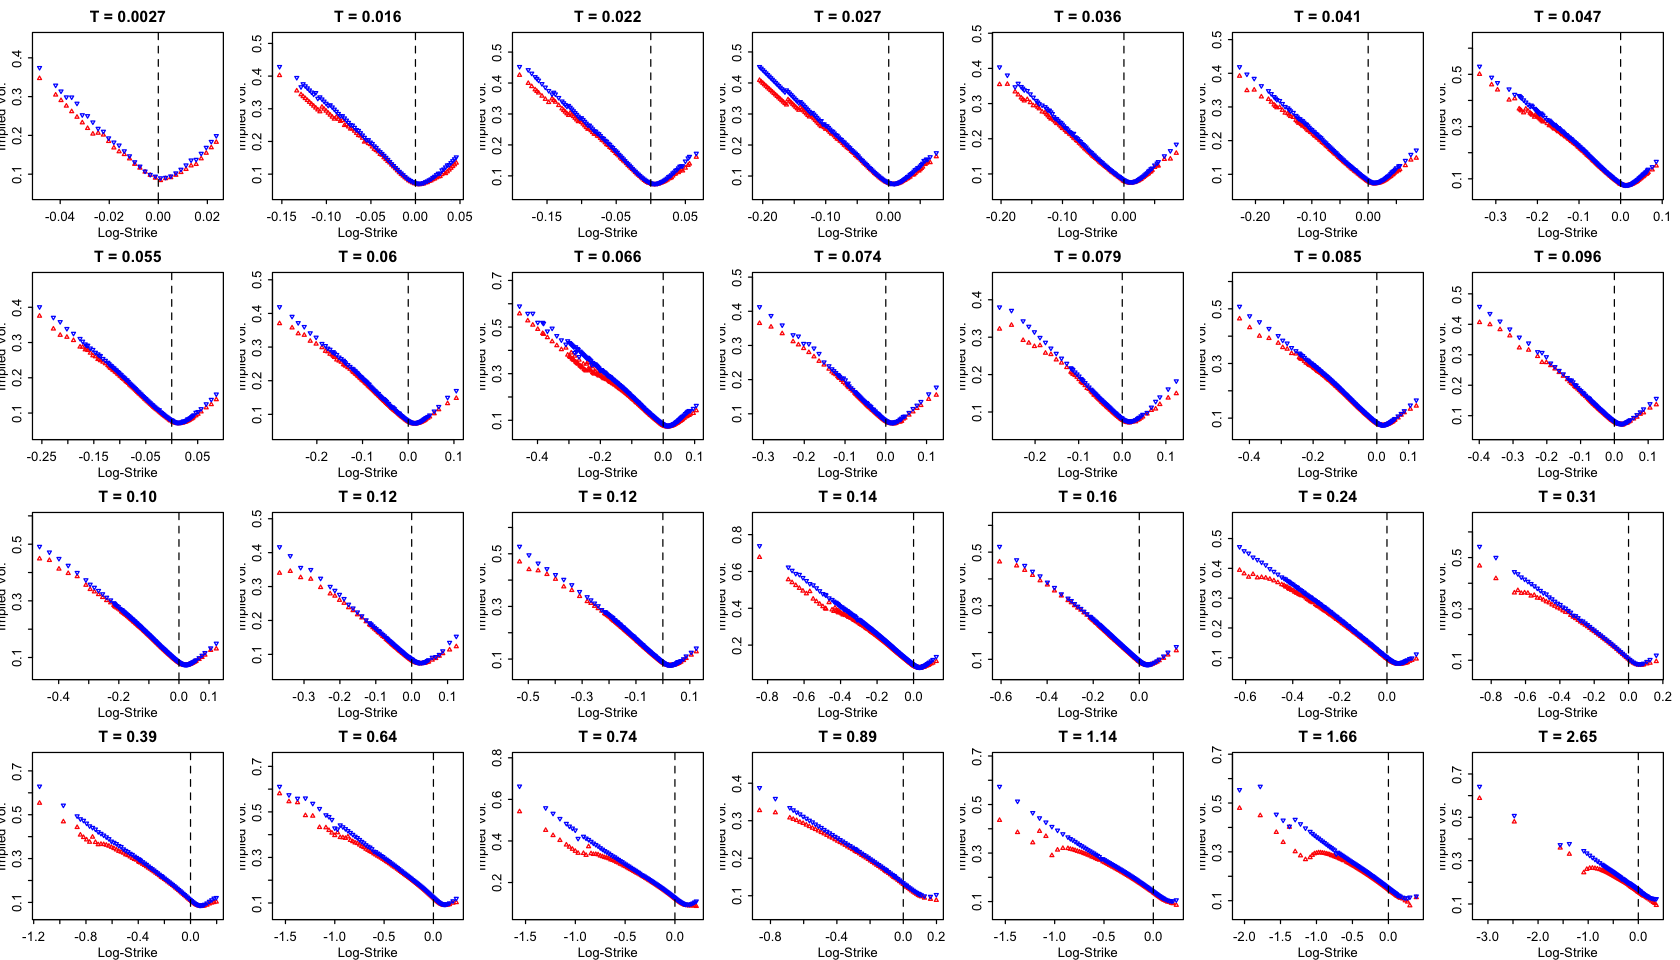

In [5]:
res <- plotIvolsMC(ivolData)

Figure 1: SPX smiles as of April 24, 2017.

In [6]:
names(res)

[1] "expiries"  "atmVols"   "atmSkew"   "atmCurv"   "atmVolsMC" "atmSkewMC"
[7] "atmErrMC"

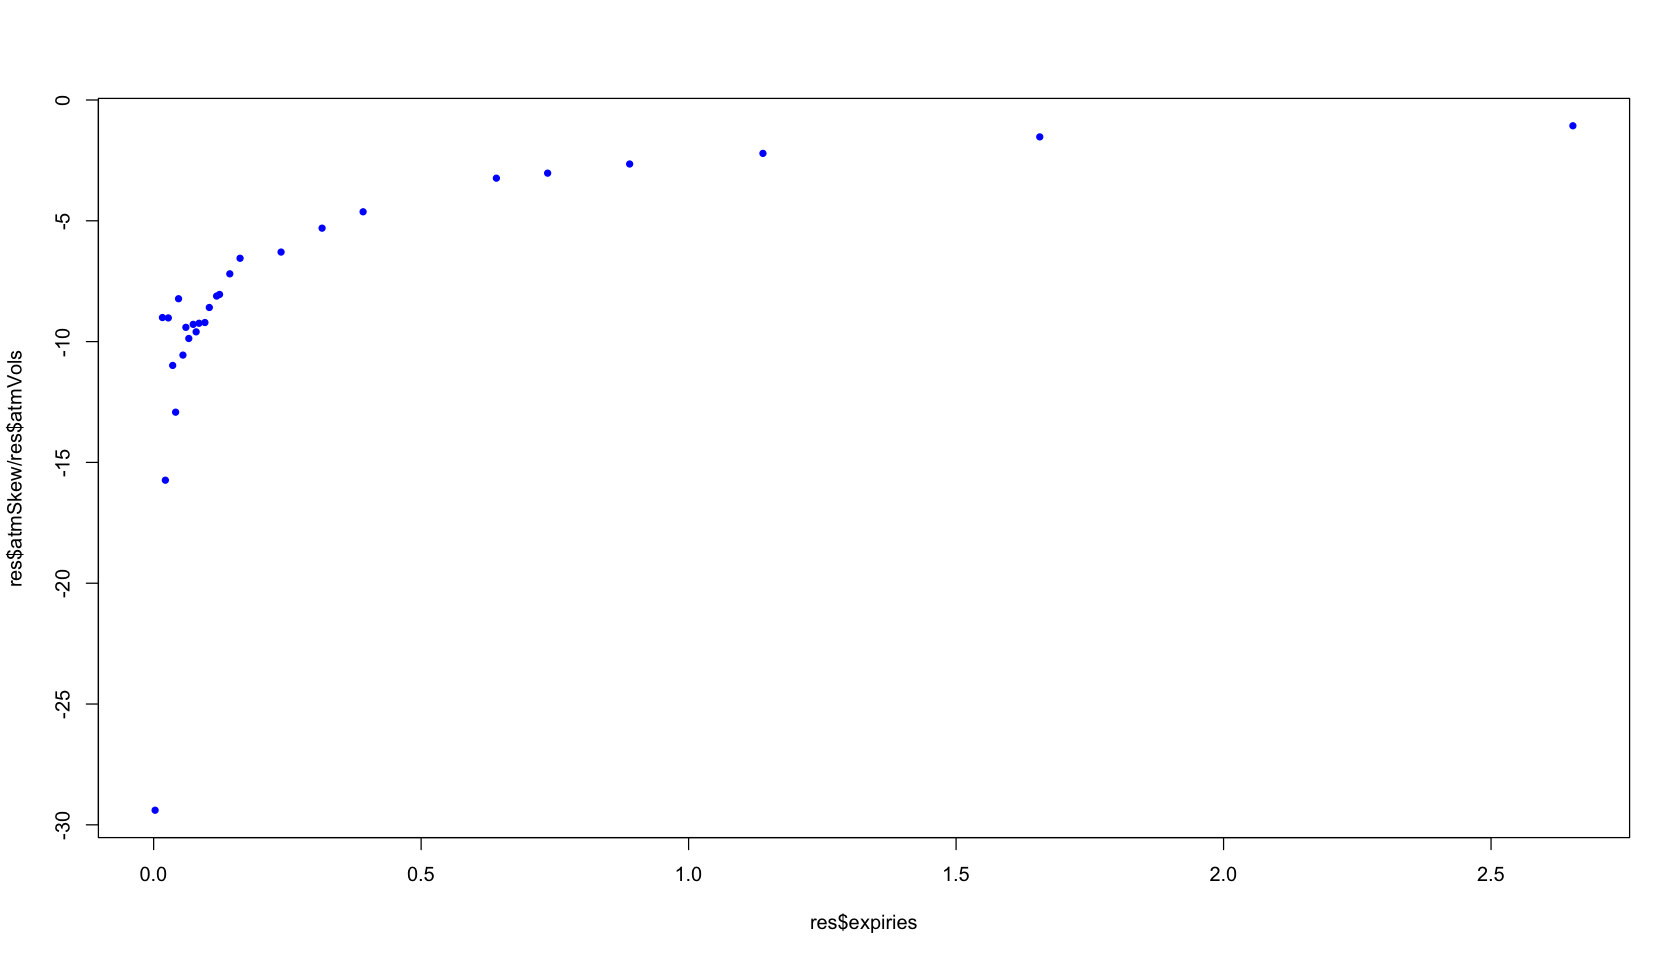

In [7]:
plot(res$expiries,res$atmSkew/res$atmVols,pch=20,col="blue")

Figure 2: Empirical ATM skews term structure as of April 24, 2017.

In [8]:
(fit.lm <- lm(log(-res$atmSkew/res$atmVols) ~ log(res$expiries)))


Call:
lm(formula = log(-res$atmSkew/res$atmVols) ~ log(res$expiries))

Coefficients:
      (Intercept)  log(res$expiries)  
           0.9710            -0.4445  


The rough Bergomi skew is roughly proportional to $\tau^{-\gamma}$ for small $\tau$ with $\gamma = 1/2-H$.

In [9]:
1/2+fit.lm$coef[2]

log(res$expiries) 
       0.05545313

We deduce that $H \approx 0.055$.

### Plot the fit

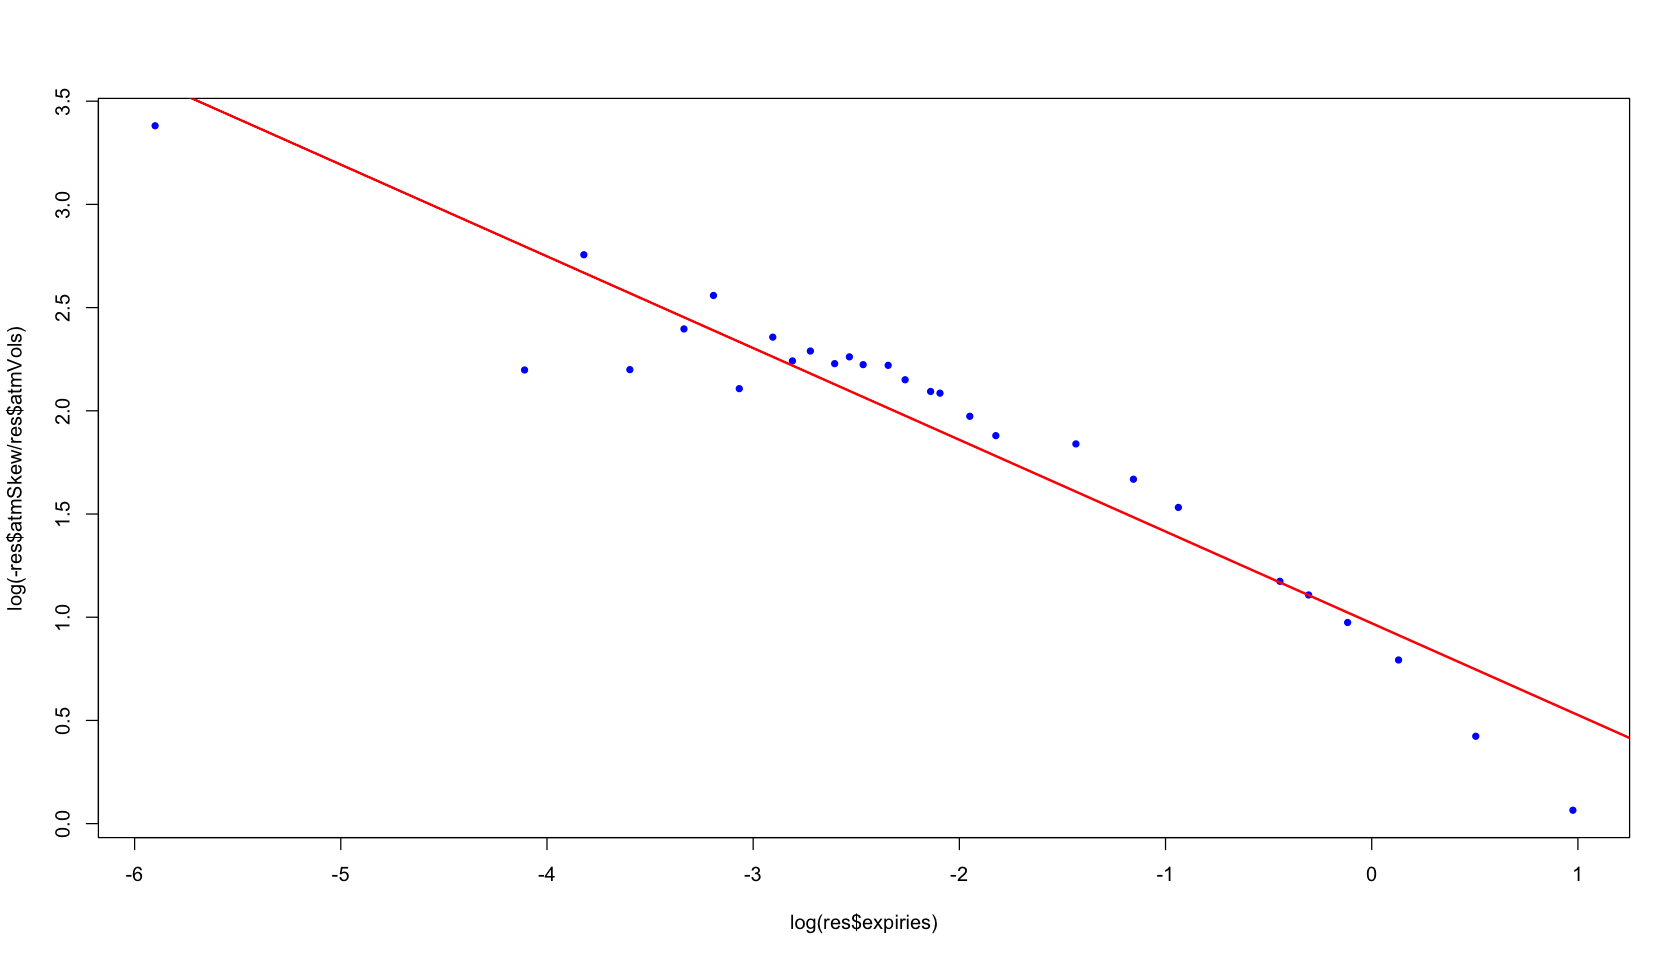

In [10]:
plot(log(res$expiries),log(-res$atmSkew/res$atmVols),pch=20,col="blue")
abline(fit.lm,col="red",lwd=2)

Figure 3: Log-log plot of the skew term structure with power-law fit.

### Run the hybrid BSS scheme

We will use R parallel processing functionality.

In [11]:
library(foreach)
library(doParallel)

Loading required package: iterators
Loading required package: parallel


### Initial parameter guesses

- We choose $H = 0.055$ from our fit to the skew term structure.


- We initially choose $\rho = -0.9 $ and $\eta = 2.3$ from the August 14, 2013 fit from <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup>.


- To run the hybrid scheme, we also need a guess for the forward variance curve.
    - In practice, this doesn't need to be too accurate.

In [12]:
params.170424 <- list(H=0.055, eta=2.3, rho=-0.9)

### Initial guess for the forward variance curve

- We estimate variance swaps using the robust methodology suggested by <span>[Fukasawa et Al.]<sup id="cite_ref-FukasawaEtAl" class="reference"><a href="#cite_note-FukasawaEtAl"><span>[</span>7<span>]</span></a></sup>.


- We build a piecewise constant forward variance curve by differencing the variance swap curve.  

In [13]:
expiries <- res$expiries
w.in <- varSwap.Robust(ivolData)$vs.mid * expiries # Robust estimate of w

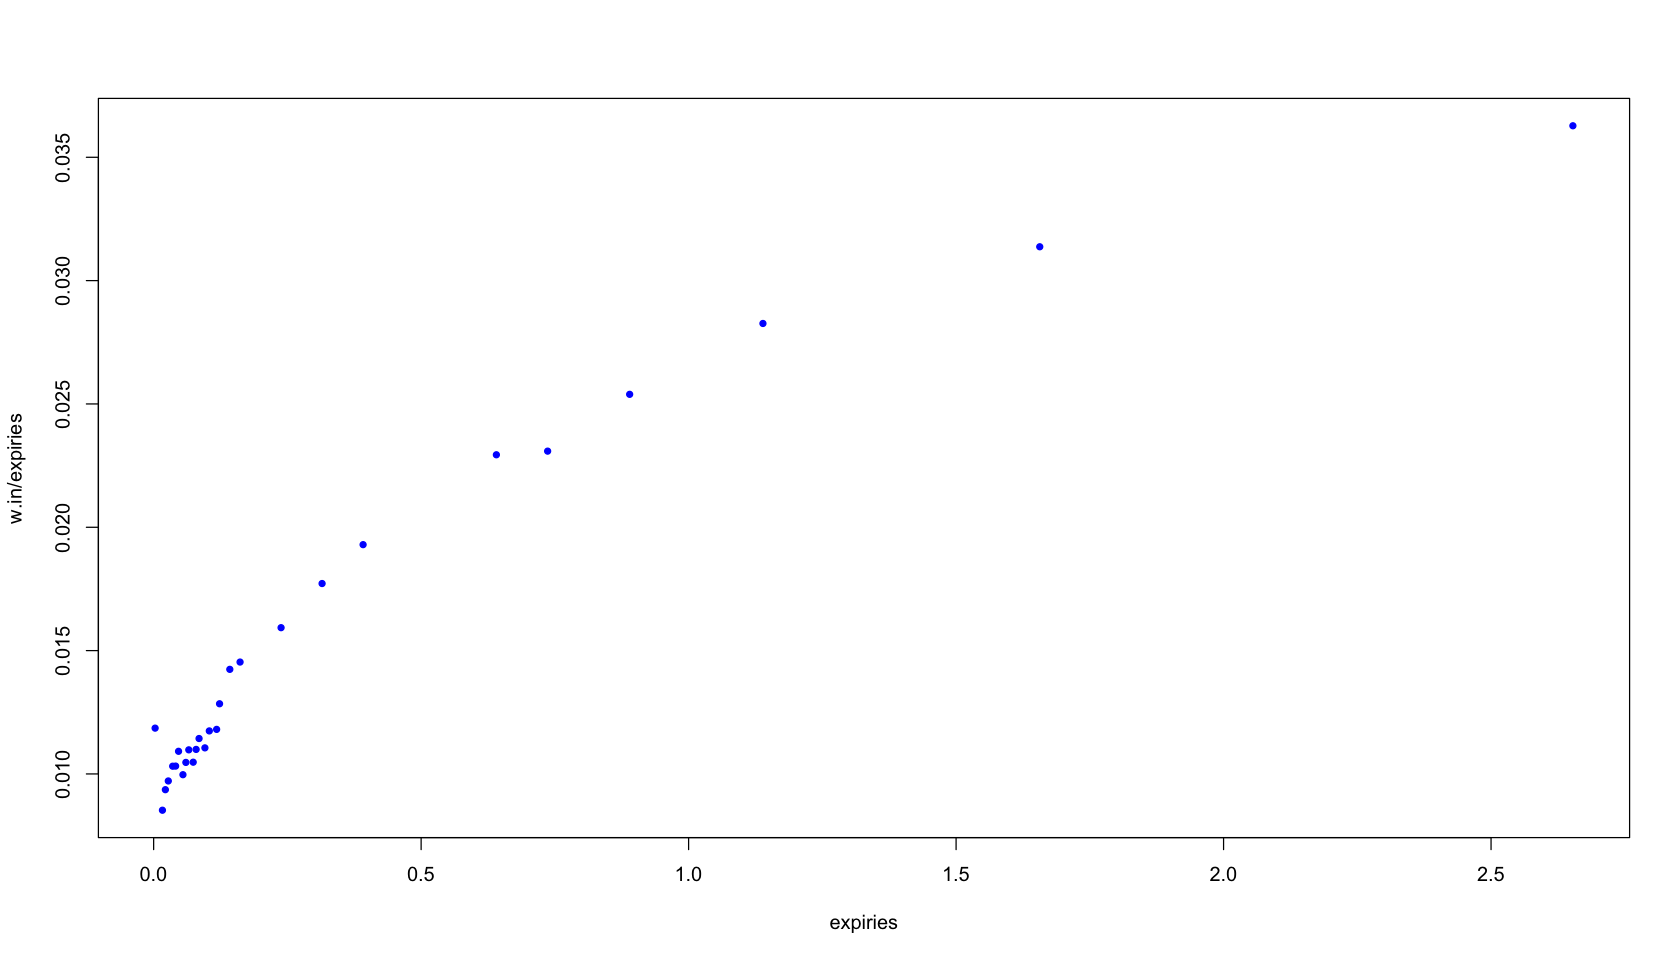

In [14]:
plot(expiries,w.in/expiries,pch=20,col="blue")

Figure 4: SPX variance curve as of April 24, 2017 estimated using Fukasawa's robust methodology.

In [15]:
xi.vec <- c(w.in[1]/expiries[1],diff(w.in)/diff(expiries))

In [16]:
xi.curve.raw <- function(t){
    n <- length(expiries)
    res <- xi.vec[sum(expiries < t)+1]
    if(t>=expiries[n]) res <- xi.vec[n]
    return(res)
}

xi.curve.170424 <- function(t){sapply(t,xi.curve.raw)}

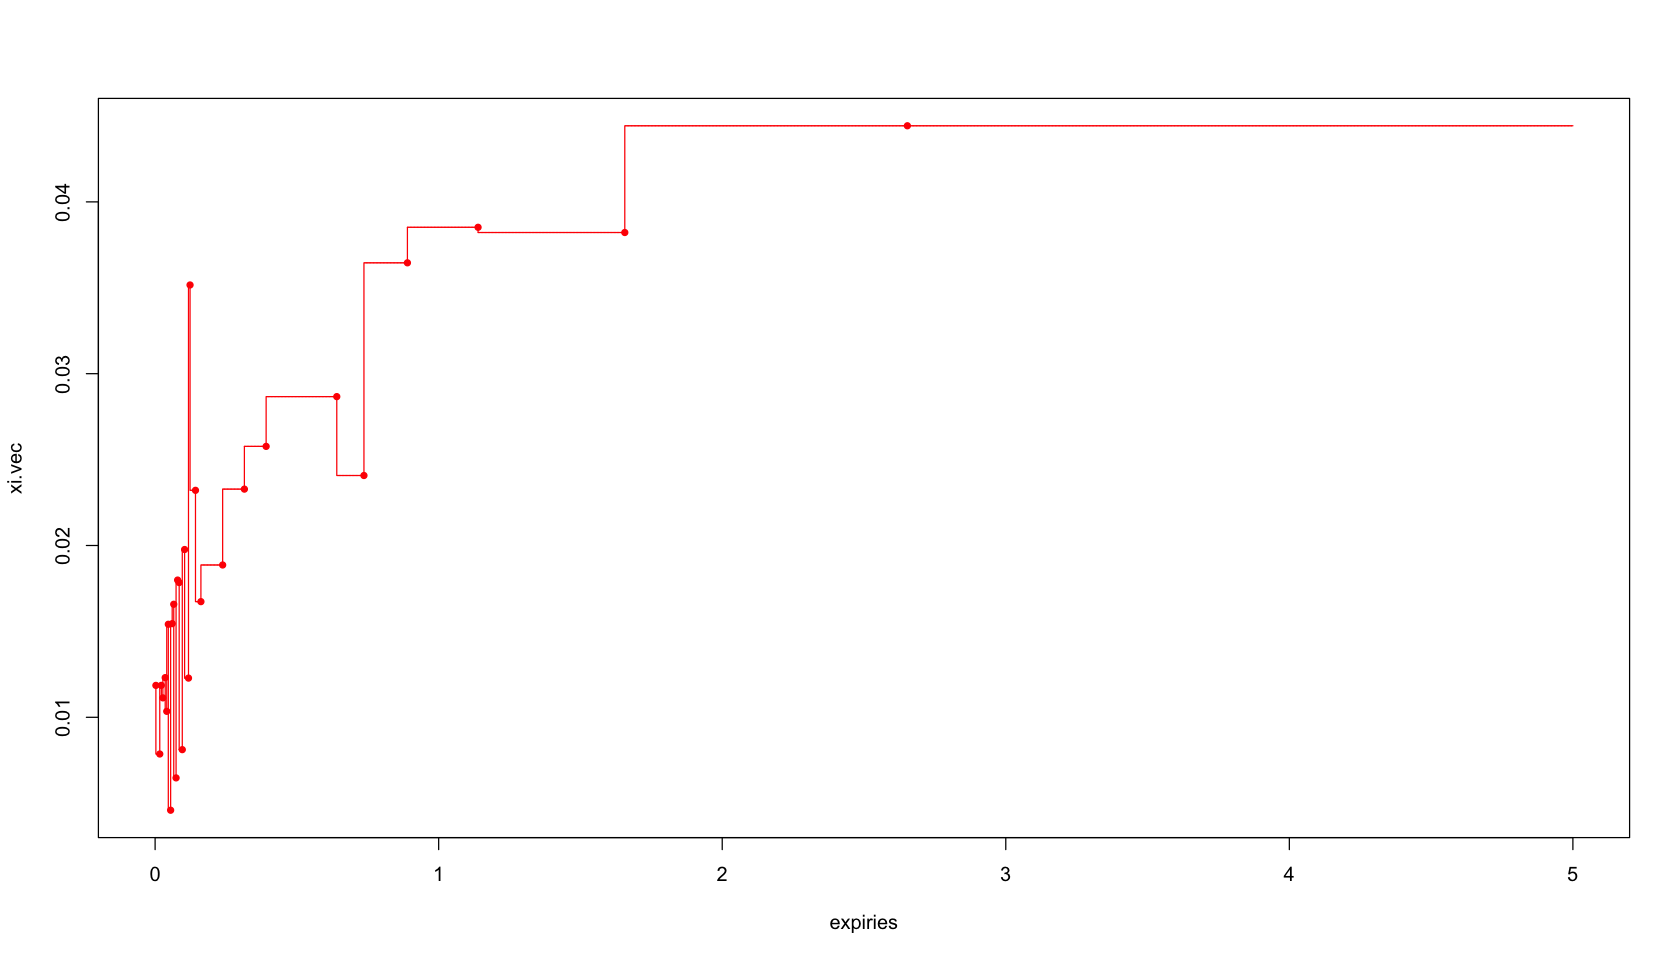

In [17]:
plot(expiries,xi.vec,pch=20,col="red",xlim=c(0,5))
curve(xi.curve.170424,from=0,to=5,col="red",add=T,n=100000)

Figure 5: Piecewise linear approximation to the forward variance curve.

To get a decent approximation to the ATM skew, we don't need many paths.  Here we use 10,000.

In [18]:
paths <- 1e5
steps <- 200

In [19]:
t0<-proc.time()

#number of iterations
iters<- max(1,floor(paths/1000))

#setup parallel backend 
cl.num <- detectCores() # This number is 8 on my MacBook Pro
cl<-makeCluster(cl.num)
registerDoParallel(cl)

#loop
ls <- foreach(icount(iters)) %dopar% {
        hybridScheme(xi.curve.170424,params.170424)(N=1000, steps=steps, expiries=expiries)
        }

stopCluster(cl)
mcMatrix1 <- do.call(cbind, ls) #Bind all of the submatrices into one big matrix

print(proc.time()- t0)

   user  system elapsed 
  0.343   0.064  17.259 


In [20]:
options(repr.plot.width=11,repr.plot.height=6)

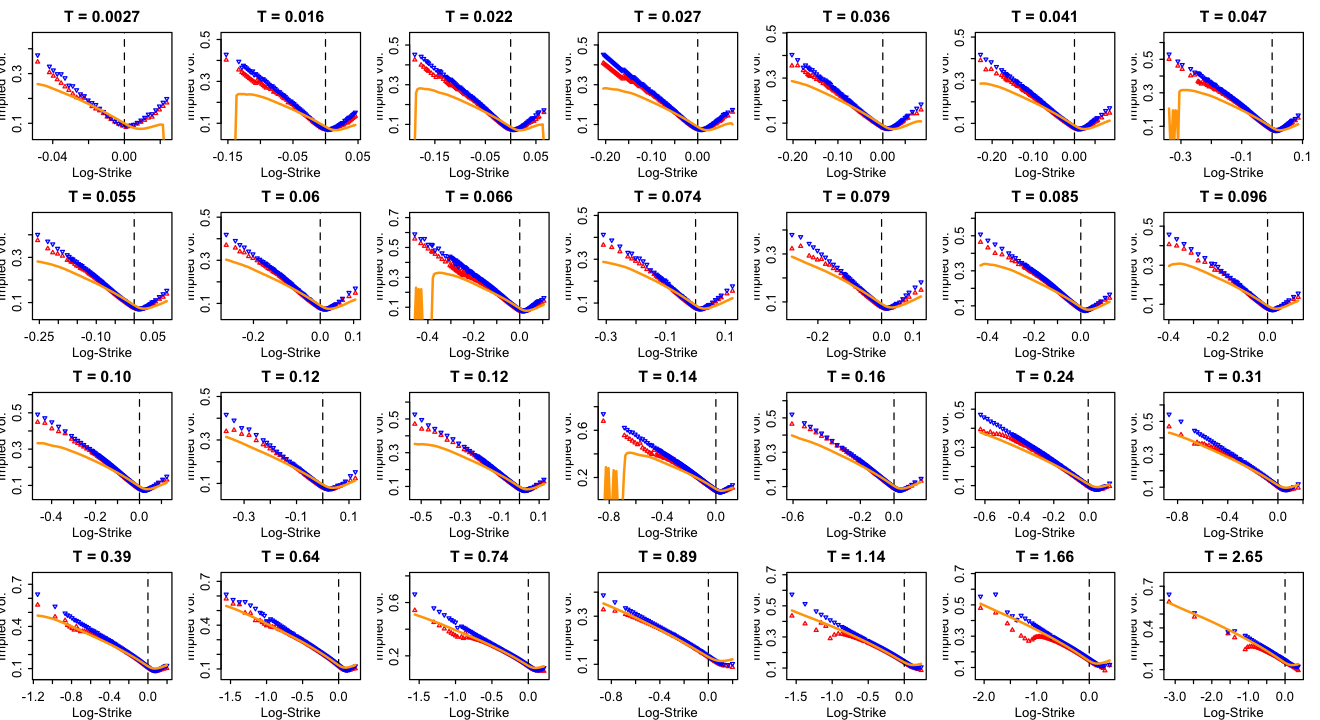

In [21]:
res1 <- plotIvolsMC(ivolData, mcMatrix=mcMatrix1)

Figure 6: SPX smiles together with rough Bergomi fit (orange) with guessed parameters.

### Plot normalized term structure of skew

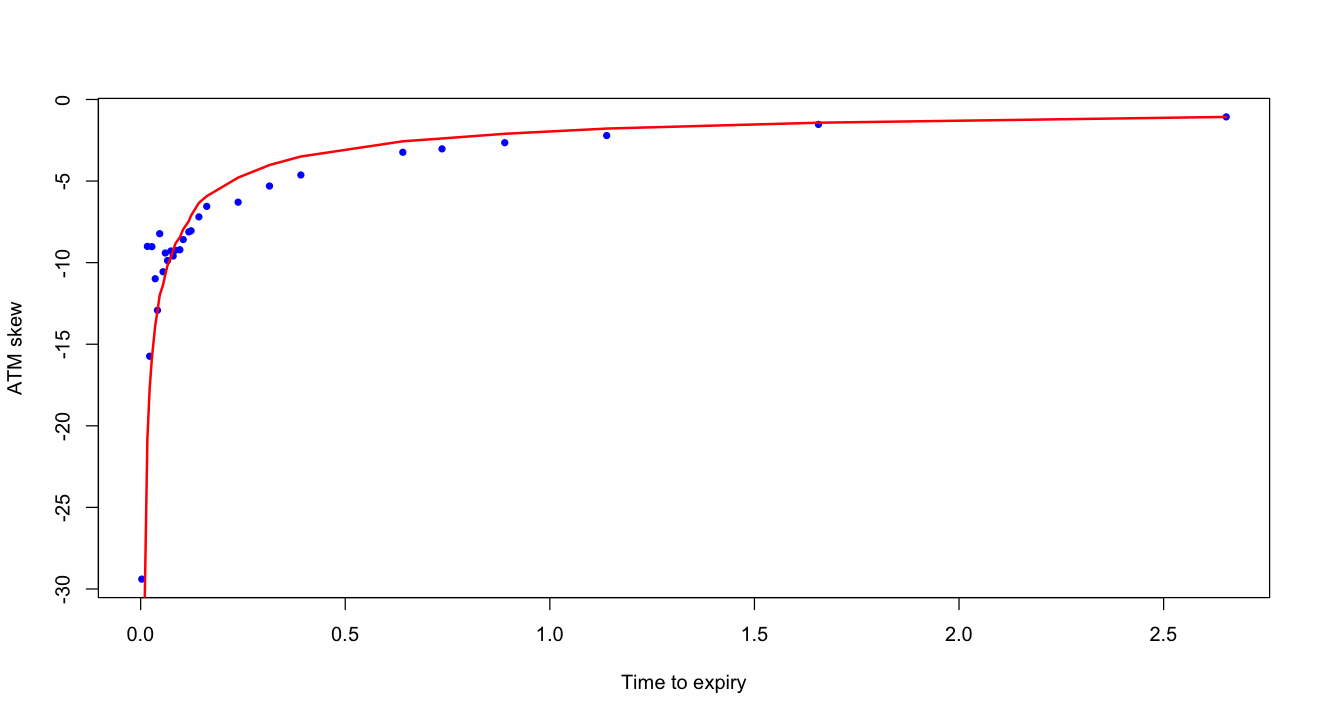

In [22]:
plot(res1$expiries,res1$atmSkew/res1$atmVols,pch=20,col="blue",
    xlab="Time to expiry",ylab= "ATM skew")
lines(res1$expiries,res1$atmSkewMC/res1$atmVolsMC,col="red",lwd=2)

Figure 7: Empirical skews in blue; rough Bergomi fit with guessed parameters in red.

- This looks more or less OK already!  

### Iterate on $\rho$ for one slice

- To fix $\rho$, we draw one smile.  In this case, we pick the fourth slice.

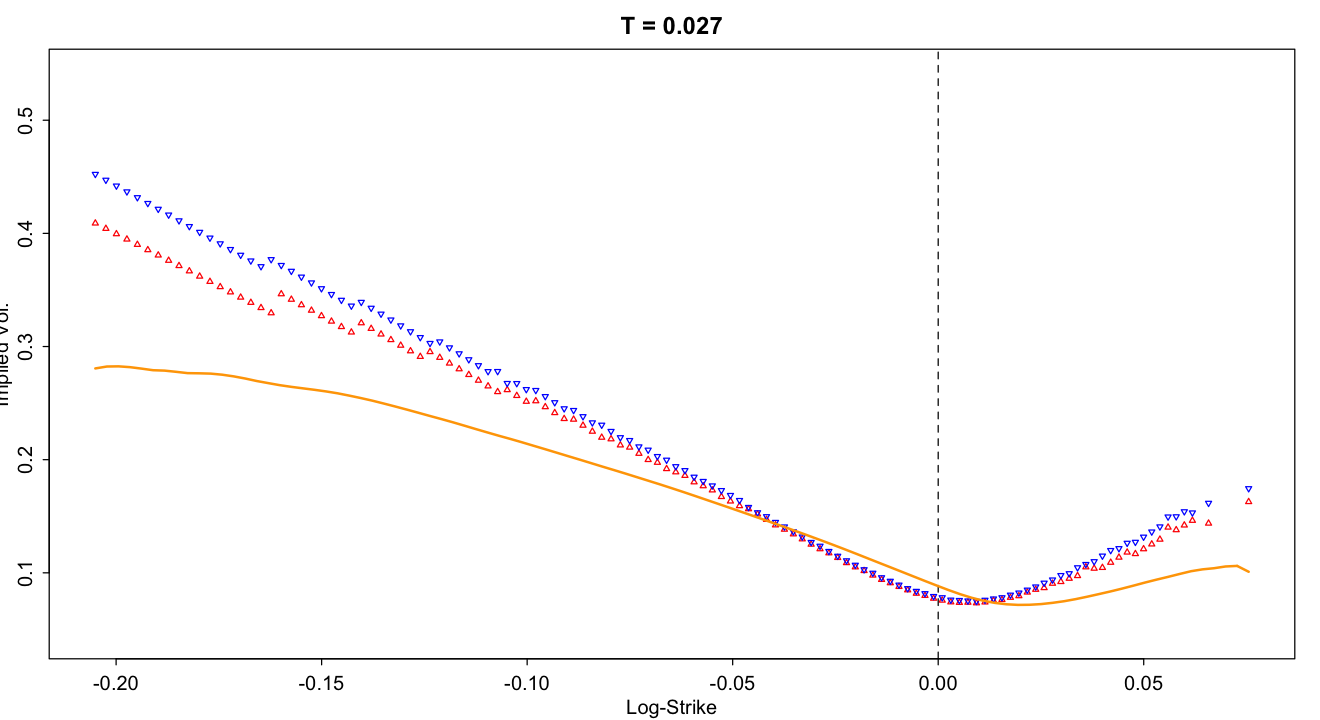

In [23]:
foo <- plotIvolsMC(ivolData, mcMatrix=mcMatrix1,slice=4)

Figure 8: The fourth expiration.  It's clear that $\rho$ needs to be less negative and $\eta$ needs to increase.

For our new guess, we choose $\rho = -.65$, keeping the product $\rho\,\eta$ constant.

In [24]:
params.170424$eta*params.170424$rho/-.65

[1] 3.184615

In [25]:
params.170424.2 <- list(H=0.055, eta=3.18, rho=-0.65)

In [26]:
t0<-proc.time()

#number of iterations
iters<- max(1,floor(paths/1000))

#setup parallel backend to use 8 processors
cl.num <- detectCores() # Should be 8
cl<-makeCluster(cl.num)
registerDoParallel(cl)

#loop
ls <- foreach(icount(iters)) %dopar% {
        hybridScheme(xi.curve.170424,params.170424.2)(N=1000, steps=steps, expiries=expiries)
        }

stopCluster(cl)
mcMatrix2 <- do.call(cbind, ls) #Bind all of the submatrices into one big matrix

print(proc.time()- t0)

   user  system elapsed 
  0.197   0.063  17.419 


### Plot term structure of skew again

In [27]:
res2 <- plotIvolsMC(ivolData, mcMatrix=mcMatrix2,plot=F)

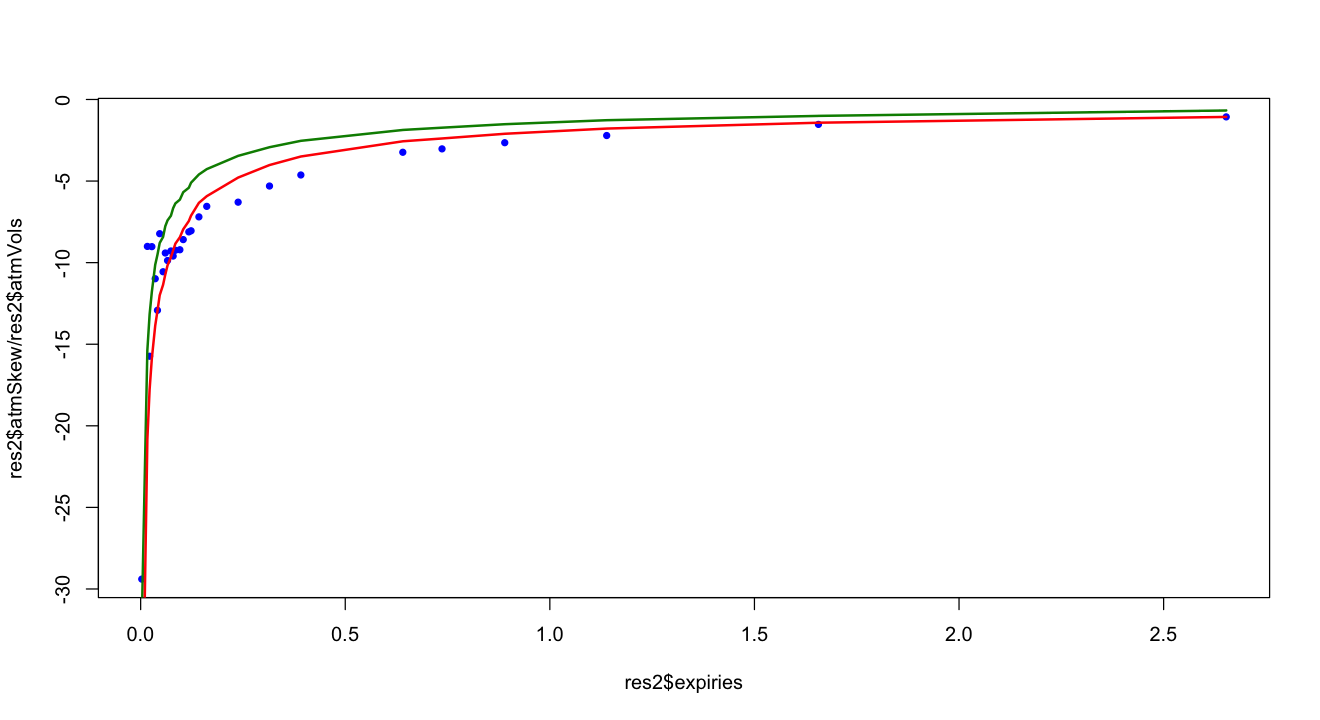

In [28]:
plot(res2$expiries,res2$atmSkew/res2$atmVols,pch=20,col="blue")
lines(res2$expiries,res2$atmSkewMC/res2$atmVolsMC,col="green4",lwd=2)
lines(res1$expiries,res1$atmSkewMC/res1$atmVolsMC,col="red",lwd=2)

Figure 9: The first guess is in red; skew with new parameters in green.


- Now the fit to the ATM skew doesn't look quite so good.
    - Maybe we need to increase $H$?


- For now, we will stop here.



### Redraw the fourth smile


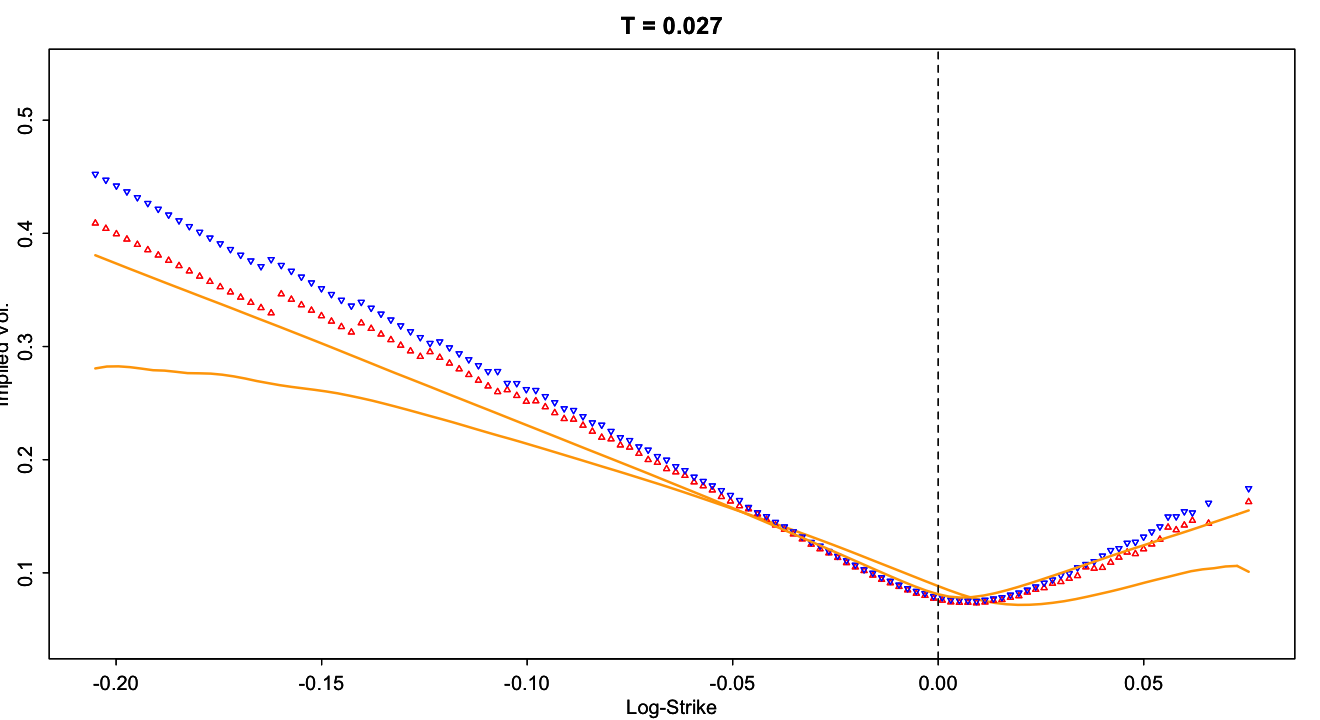

In [29]:
foo <- plotIvolsMC(ivolData, mcMatrix=mcMatrix1,slice=4)
par(new=T)
foo2 <- plotIvolsMC(ivolData, mcMatrix=mcMatrix2,slice=4)

Figure 10: The new fit is much better!

### Draw another smile


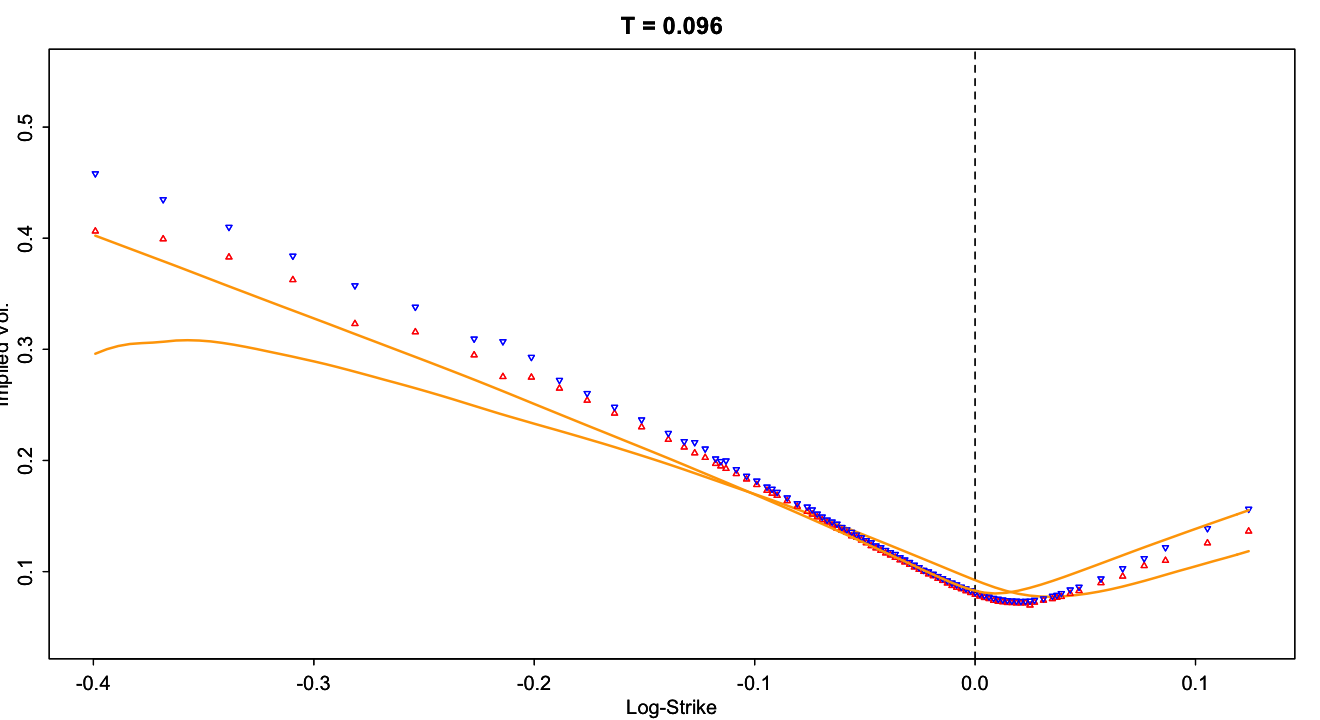

In [30]:
foo <- plotIvolsMC(ivolData, mcMatrix=mcMatrix1,slice=14)
par(new=T)
foo2 <- plotIvolsMC(ivolData, mcMatrix=mcMatrix2,slice=14)

Figure 11: The new fit is still better but not fantastic. We would need to adjust $\rho$ again.

### Another complication: ATM volatilities

- The rough Bergomi smile may not be the same shape as the market smile.
    - Moreover, the robust Fukasawa procedure has flat extrapolation of the smile in the wings.
    
    
-  It follows that with our initial guess to the forward variance curve, ATM volatilities will not in general be matched.




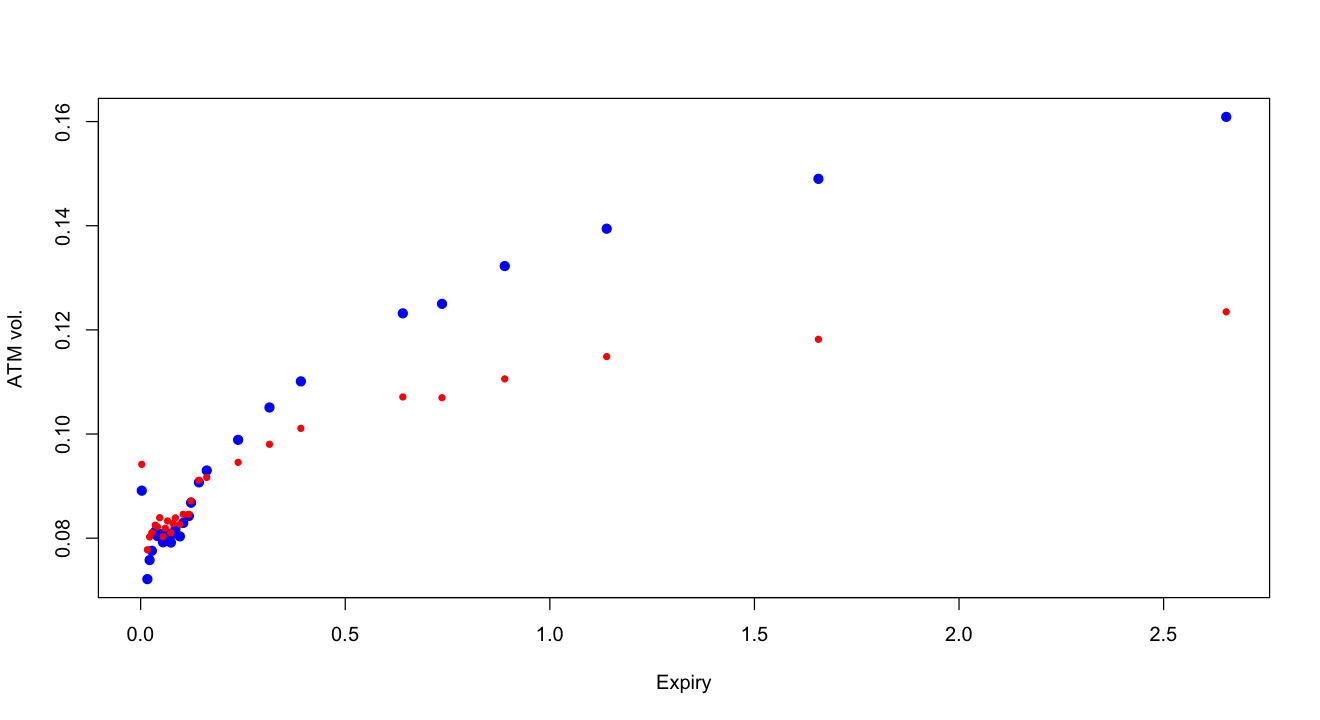

In [31]:
plot(res2$expiries,res2$atmVols,pch=20,cex=1.5,col="blue",
     xlab="Expiry",ylab="ATM vol.")
points(res2$expiries,res2$atmVolsMC,pch=20,col="red")

Figure 12: Empirical ATM volatilities in blue; model ATM volatilities in red.

### Iterating on $\xi_t(u)$ to match ATM volatilities

- We see that model and empirical ATM volatilities are close enough for shorter expirations but quite far off for longer expirations.


- We need to iterate on the forward variance curve $\xi_t(u)$ to match ATM volatilities.
    - 6 iterations were required in this case.


- In practice, this does not substantially alter the quality of the fit.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/07/atmVol170427.png" align = "center" width=900></h3> 

Figure 13:  Empirical ATM volatilities in blue; model ATM volatilities (after 6 iterations) in pink.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/07/atmSkew170427.png" align = "center" width=900></h3> 

Figure 14:  Empirical ATM skews in blue; Model skews in red and green respectively.  Changing the forward curve has not significantly changed the model skews.

### Calibration using Chebyshev interpolation

Christian Bayer and I tried calibrating the Rough Bergomi model to the volatility surface as follows:

  
-  For a given set of 3 parameters, compute option prices using the hybrid BSS scheme.  Compute a suitably chosen objective function.
-  Following a suggestion of Kathrin Glau, 
  -  Repeat this 125 times on a 5x5x5 grid of Chebyshev knots.
  -  Use Chebyshev interpolation to fill in the gaps.
  -  Find the minimum of the objective.
 

  

-  Despite that the hybrid scheme is very much faster than the Cholesky exact simulation scheme used in <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>3<span>]</span></a></sup>, this procedure still took 2 hours running in parallel on 32 CPUs.

  
-  The problem is that over one million paths are needed to get Monte Carlo error down to a level that allows resolution of the minimum of the objective function.


-  Another idea is to find some quantity, such as the variance swap, that is exactly computable in the model, and may be accurately estimated from market prices.
 

### $H$ from VIX futures

- Alternatively, following [Jacquier, Martini and Muguruza], one can try to fix $H$ from the term structure of the convexity adjustment between variance swaps and VIX futures as explained in Lecture 2.


- Once the Volterra process $\tilde W$ has been simulated for this $H$, iterating on the parameters $\eta$ and $\rho$ to fit the observed volatility surface is relatively fast.
    
    
- The main practical trick is to fit normalized smiles
<p>
$$
\hat \sigma(k,T) = \frac{\sigma(k,T)}{\sigma(0,T)}.
$$
<p>
ATM volatilities can then be fitted by iterating on the forward variance curve as explained above.

### The Alòs decomposition formula

Following <span>[Alòs]<sup id="cite_ref-Alos" class="reference"><a href="#cite_note-Alos"><span>[</span>1<span>]</span></a></sup>, let $X_t = \log S_t/K$ and consider the price process

$$
dX_t  = \sigma_t\,dZ_t - \frac12\,\sigma_t^2\,dt.
$$

Now let $H(X_t,w_t(T))$ ($H_t$ for short) be some function that solves the Black-Scholes equation.
  
-  Specifically, 
$$
-\p_w H_t + \frac12\, \left(\p_{xx} - \p_x\right) H_t = 0
$$
which is of course the gamma-vega relationship.

  
-  Note in particular that $\p_x$ and $\p_w$ commute when applied to a solution of the Black-Scholes equation.
 

### Variance swaps

We now specify the variance swap $w_t(T)$ (Bergomi-Guyon style) as:

$$
w_t(T) = \int_t^T \,\eef{\sigma_u^2}\,du = \int_t^T \,\xi_t(u)\,du.
$$

where the $\xi_t(u)$ are forward variances. 
  
-  $w_t(T)$ then represents the value of the static hedge portfolio (the log-strip) for a variance swap and is thus a *tradable asset* in the terminology of <span>[Fukasawa]<sup id="cite_ref-Fukasawa" class="reference"><a href="#cite_note-Fukasawa"><span>[</span>6<span>]</span></a></sup>.


-   For each $u$, $\xi_t(u)$ is a martingale in $t$ so we may write

$$
d w_t(T) = -\sigma_t^2\,dt + \int_t^T \,d\xi_t(u)\,du =: -\sigma_t^2\,dt + dM_t
$$

where $M$ is a martingale.
 

### The Itô Decomposition Formula

Applying Itô's Formula to $H$, taking conditional expectations, simplifying using the Black-Scholes equation and integrating, we obtain

#### The  Itô Decomposition Formula of Alòs

<a name="eq:AlosJG"></a>(1)
$$
\bea
\eef{H_T }
&=&
H_t +\eef{ \int_t^T\, \p_{xw} H_s\,d\angl{X,M}_s}\nonumber\\\
&& \quad\quad+  \frac 12\,\eef{\int_t^T\,\p_{ww} H_s \,d\angl{M,M}_s}.
\eea
$$


-   Note in particular that this decomposition is *exact*.

### Diamond notation

Let us introduce the following notation for covariance functionals.

Let $A_t$ and $B_t$ be stochastic processes (some combinations of $X_t$ and $M_t$).  Then

$$
(A \dm B)_t(T) = \eef{\int_t^T d\angl{A,B}_s}.
$$

When $(A \dm B)_t(T)$ appears before a solution of the Black-Scholes equation (denoted by $H_t$), the relevant differential operators $\p_x$ and/or $\p_w$ should be applied to $H_t$.

Many of the expressions in what follows will involve combinations of $X_t\,\p_x$ and $M_t\,\p_w$.  When we write a square bracket, the operators $\p_x$ and $\p_w$ are to be understood.  

So for example

$$
\beas
(X \dm M)_t(T)\,H_t &=&\eef{\int_t^T d\angl{X,M}_s}\,\p_{x w} \,H_t\\
\left( M \dm M \right)_t(T)\,H_t 
&=& \eef{\int_t^T d\angl{M,M}_s}\,\p_{w w}\,H_t\\
\left(X \dm (X \dm M)\right)_t(T)\,H_t &=& \eef{\int_t^T d\angl{X,(X \dm M)}_s}\,\p_{x x w}\,H_t,
\eeas
$$

and so on.  

We will often drop the explicit dependence on $T$ or even on $t$.  So for example, it is to be understood that

$$
(X \dm M) = \eef{\int_t^T d\angl{X,M}_s}.
$$

### Bergomi-Guyon

-  The smile expansion (Equation (14) of <span>[Bergomi and Guyon]<sup id="cite_ref-BG" class="reference"><a href="#cite_note-BG"><span>[</span>1<span>]</span></a></sup> reads

$$
\sigma_{\BS}(k,T) = \hat \sigma_T + \cS_T\,k + \cC_T\,k^2 + \cO(\epsilon^3)
$$

where the coefficients $\hat \sigma_T$, $ \cS_T$ and $\cC_T$  are complicated combinations of terms of the form $(A \dm B)$ with $A,B = $ $X$ or $M$.


-  For example, in Bergomi-Guyon notation,
$(X\dm  M )_t(T) = C^{x \xi}$, $(M \dm M)_t(T) =
C^{\xi \xi}
$ and $X \dm (X\dm  M )_t(T) = C^{\mu}$.
 

### Freezing derivatives

Freezing the derivatives in [(1)](#eq:AlosJG) gives us the approximation

$$
\beas
\eef{H_T }
&\approx &
H_t +\eef{ \int_t^T\,d\angl{X,M}_s}\,\p_{xw} H_t\nonumber\\\
&& \quad\quad+  \frac 12\,\eef{\int_t^T \,d\angl{M,M}_s}\,\p_{ww} H_t\\
&=&
H_t +(X\dm M)_t(T)\, H_t +  \frac 12\,(M\dm M)_t(T)\, H_t.
\eeas
$$

- In Theorem 3.3 of [Alòs] for example the error in this approximation is bounded in the context of European option pricing.

### The idea of the exponentiation theorem


- The essence of the exponentiation theorem we prove in <span>[Alòs, Gatheral and Radoičić]<sup id="cite_ref-AGR" class="reference"><a href="#cite_note-AGR"><span>[</span>2<span>]</span></a></sup> is that we may express $\eef{H_T }$ as an exact expansion consisting of infinitely many terms, with derivatives in each such term frozen. 


### Trees and forests

  
- Terms such as $(X \dm M)$, $(M \dm M)$ and $X \dm (X \dm M)$ are naturally indexed by trees, each of whose leaves corresponds to either $X$ or $M$.
     - Such a term would be represented as a tree with 3 nodes and 2 branches.  


- Though it will not be necessary for us to draw such trees explicitly, we will adopt the language of forests $\mF_k$ of trees.

  
-  If $X$ is counted as a single leaf, and $M$ as a double leaf, then trees in $\mF_k$ have $k+2$ leaves.
 

### The exponentiation theorem


Let $H_t$ be any solution of the Black-Scholes equation.  Then, provided  $\eef{H_T}$ is finite,

$$
\eef{H_T}= e^{\sum_{k=1}^\infty\,\mF_k}\,H_t
$$

with $\mF_0 = M$ and 

$$
\mF_k =\frac12\,\sum_{i,j=0}^{k-2}\,\mathbb{1}_{i+j = k-2}\,\mF_i \dm \mF_j + X \dm \mF_{k-1}.
$$

### The first few terms

Applying the recursion, we have

$$
\bea
\mF_0  &=& M \nonumber\\
\mF_1 &=& X \dm \mF_0 = (X \dm M) \nonumber\\
\mF_2 &=& \frac12 (\mF_0 \dm \mF_0) + X \dm \mF_1 = \frac12 (M \dm M) + X \dm (X \dm M)\nonumber\\
\mF_3 &=&  (\mF_0 \dm \mF_1) + X \dm \mF_2 \nonumber\\
&=& M \dm (X \dm M) +  X \dm \frac12 (M \dm M) + X \dm (X \dm (X \dm M))\nonumber\\
\eea
$$

### If $H_t$ is a characteristic function

Consider the Black-Scholes characteristic function

$$
\Phi_t^T(a) =e^{\ui\,a\,X_t - \frac{1}{2}a\,\left(a+\ui\right)\,w_t(T)}
$$

which satisfies the Black-Scholes equation.
It is straightforward to verify that

$$
\p_w \Phi_t^T(a)= \frac12\,\left(\p_{x,x} - \p_x\right) \Phi_t^T(a).
$$
  

- The $\mF_k(a)$ are iterated integrals of $X\,\p_x$ and $M\,\p_w$.  


-  Applying $\mF_k$ to $\Phi$ thus just multiplies $\Phi$ by some deterministic factor. 

-  Then
$$
e^{\sum_{k=1}^\infty\,\mF_k}\,\Phi_t^T(a)=e^{\sum_{k=1}^\infty\,\tilde {\mF}_k(a)}\,\Phi_t^T(a)
$$
where $\tilde{\mF}_k(a)$ is $\mF_k$ with each occurrence of $\p_x$ replaced with $\ui\,a$ and each occurrence of $\p_w$ replaced with $-\frac12\,a\,(a+\ui)$.  

 

### The characteristic function under stochastic volatility

Applying the Exponentiation Theorem, we have the following lemma.

Let 

$$
\varphi_t^T(a) = \eef{e^{\ui\,a\,X_T}}
$$

be the characteristic function of the log stock price.  Then

$$
\varphi_t^T(a) = e^{\sum_{k=1}^\infty\,\tilde {\mF}_k(a)}\,\Phi_t^T(a).
$$

### The characteristic function under stochastic volatility

As a corollary, the cumulant  generating function (CGF) is given by

$$
\psi_t^T(a) = \log \varphi_t^T(a) = \ui\,a\,X_t - \frac{1}{2}a\,(a+\ui)\,w_t(T) + \sum_{k=1}^\infty\,\tilde {\mF}_k(a).
$$

### Variance and gamma swaps

The variance swap is given by the fair value of the log-strip:

$$
\eef{X_T}= (-\ui)\,{\psi_t^T}'(0) = X_t - \frac{1}{2}\,w_t(T)
$$

and the gamma swap (wlog set $X_t=0$) by

$$
\eef{X_T \,e^{ X_T}} = \left. (-\ui)\,\frac{d}{da}\,\psi_t^T(a)\right|_{a=-\ui}.
$$

- The point is that we can in principle compute such moments for any stochastic volatility model written in forward variance form, whether or not there exists a closed-form expression for the characteristic function.

### The gamma swap

We can compute the gamma swap as

$$
\eef{X_T \,e^{ X_T}} = \left. (-\ui)\,\frac{d}{da}\,\psi_t^T(a)\right|_{a=-\ui}.
$$

It is easy to see that only trees containing a single $M$ leaf will survive in the sum after differentiation when $a = - \ui$ so that

$$
\sum_{k=1}^\infty \,{\tilde \mF_k}'(-\ui) =\frac12\,\sum_{k=1}^\infty \,(X \dm)^k M
$$
where $ (X \dm)^k M $ is defined recursively for $k>0$ as $(X \dm)^k M= X \dm ( X \dm)^{k-1} M$. 

- For example, $(X \dm)^3 M = (X \dm (X \dm (X \dm M)))$.

Then the fair value of a gamma swap is given by

$$
\cG_t(T) = 2\,\eef{X_T \,e^{ X_T}} = w_t(T)  +\sum_{k=1}^\infty \,(X \dm)^k M.
$$

- This expression allows for explicit computation of the gamma swap for any model written in forward variance form. 

### The leverage swap

We deduce that the fair value of a leverage swap is given by

<a name="eq:leverage"></a>(2)
$$
\cL_t(T) = \cG_t(T) - w_t(T) = \sum_{k=1}^\infty \,(X \dm)^k M.
$$  

-  The leverage swap is expressed explicitly in terms of covariance functionals of the spot and vol. processes.
  
  
-  If spot and vol. processes are uncorrelated, the fair value of the leverage swap is zero.
 

-  We will now use [(2)](#eq:leverage) to compute an explicit expression for the value of a leverage swap in the rough Heston model.

### The rough Heston model

In the zero mean reversion limit, the rough Heston model of <span>[El Euch and Rosenbaum]<sup id="cite_ref-EER" class="reference"><a href="#cite_note-EER"><span>[</span>5<span>]</span></a></sup> (with $\lambda=0$) may be written as

$$
\frac{dS_t}{S_t}= \sqrt{v_t}\, \left\{   \rho\, dW_t + \sqrt{1-\rho^2}\,dW_t^{\perp} \right\} = \sqrt{v_t}\, dZ_t
$$

with 

$$ 
v_u =\xi_t(u)+\frac{\nu}{\Gamma(\alpha)}\, \int_t^u    \frac{\sqrt{v_s}}{(u-s)^\gamma}  \,dW_s , \quad u\geq t
$$

where $\xi_t(u) = \eef{v_u}$ is the forward variance curve, $\gamma = \frac 12 - H$ and $\alpha = 1-\gamma = H+\frac 12$.  

### The rough Heston model in forward variance form


In forward variance form,

$$
\beas
\frac{dS_t}{S_t} &=& \sqrt{v_t}\,dZ_t\\
d\xi_t(u) &=& \frac{\nu}{\Gamma(\alpha)} \,\frac{\sqrt{v_t}}{(u-t)^\gamma}\,dW_t.
\eeas
$$

- The above model is a natural fractional generalization of the classical Heston model which reads, in forward variance form,

$$
d\xi_t(u) = \nu\,\sqrt{v_t}\,e^{-\kappa\,(u-t)}\,dW_t.
$$

### Computation of autocovariance functionals

Apart from $\cF_t$ measurable terms (abbreviated as `drift'), we have

$$
\beas
dX_t &=& \sqrt{v_t}\,dZ_t + \text{drift}\\
dM_t &=& \int_t^T\,d\xi_t(u)\,du \\
& =& \frac{\nu}{\Gamma(\alpha)} \,\sqrt{v_t} \,\left(\int_t^T\,\frac{du}{(u-t)^\gamma}\right)\,dW_t\\
& =& \frac{\nu\,(T-t)^\alpha}{\Gamma(1+\alpha)} \,\sqrt{v_t} \,dW_t.
\eeas
$$


### The first order forest

There is only one tree in the forest $\mF_1$.

$$
\beas
\mF_1=(X \dm M)_t(T) &=& \eef{\int_t^T d\angl{X,M}_s}\nonumber\\
&=& \frac{\rho\,\nu}{\Gamma(1+\alpha)} \,\eef{\int_t^T \,v_s \,(T-s)^\alpha\,ds}\nonumber\\
&=& \frac{\rho\,\nu}{\Gamma(1+\alpha)} \,\int_t^T \,\xi_t(s) \,(T-s)^\alpha\,ds.
\eeas
$$

### The second order forest

There are two trees in $\mF_2$.  The first tree is

$$
\beas
(M \dm M)_t(T) &=& \eef{\int_t^T d\angl{M,M}_s}\nonumber\\
&=& \frac{\nu^2}{\Gamma(1+\alpha)^2} \,\int_t^T \,\xi_t(s) \,(T-s)^{2\,\alpha}\,ds.
\eeas
$$

The second tree $\left(X \dm (X \dm M)\right)_t (T) $ is more complicated.  

Define for $j \geq 0$

$$
I^{(j)}_t(T):=\int_t^T\,ds\,\xi_t(s)\,(T-s)^{j\,\alpha}.
$$

### In terms of $I^{(j)}_t(T)$

We may then rewrite the above expressions as

$$
\beas
(X \dm M)_t(T) &=& \frac{\rho\,\nu}{\Gamma(1+\alpha)} \,I^{(1)}_t(T)\\
(M \dm M)_t(T) &=& \frac{\nu^2}{\Gamma(1+\alpha)^2} \,I^{(2)}_t(T).
\eeas
$$

A little more computation gives

$$
\beas
\left(X \dm (X \dm M)\right)_t (T) &=&  \eef{\int_t^T d\angl{X,I^{(1)}}_s}\nonumber\\
&=& \frac{\rho^2\,\nu^2}{\Gamma(1+\alpha)} \,\frac{\Gamma(1+\alpha)}{\Gamma(1+2\,\alpha)}\int_t^T\,ds\,\eef{\int_s^T \,v_s\,(T-s)^{2\,\alpha}\,ds}\nonumber\\
  &=& \frac{\rho^2\,\nu^2}{\Gamma(1+\alpha)\,\Gamma(\alpha)} \,\int_t^T\,ds\,\eef{\int_s^T \,v_s \,\frac{(T-u)^\alpha}{(u-s)^\gamma}\,du}\nonumber\\
&=& \frac{\rho^2\,\nu^2}{\Gamma(1+2\,\alpha)} \,\int_t^T\,ds\,\,\xi_t(s)\,(T-s)^{2\,\alpha}\nonumber\\
&=& \frac{\rho^2\,\nu^2}{\Gamma(1+2\,\alpha)} \,I^{(2)}_t(T).
\eeas
$$

One can be easily convinced that each tree in the level-$k$ forest $\mF_k$ is  $I^{(k)}$ multiplied by a simple prefactor.  

### The third order forest

For example, continuing to the forest $\mF_3$, we have the following.

$$
\beas
\left(M \dm (X \dm M)\right)_t (T) &=&  \frac{\rho\,\nu^3\,\Gamma(1+2\,\alpha)}{\Gamma(1+\alpha)^2\,\Gamma(1+3\,\alpha)} \,I^{(3)}_t (T)\\
\left(X \dm \left(X \dm (X \dm M)\right)\right)_t  (T) &=& \frac{\rho^3\,\nu^3}{\Gamma(1+3\,\alpha)} \,I^{(3)}_t (T)\\
\left(X \dm (M \dm M)\right)_t  (T) &=& \frac{\rho\,\nu^3\,\Gamma(1+2\,\alpha)}{\Gamma(1+\alpha)^2\,\Gamma(1+3\,\alpha)} \,I^{(3)}_t (T).
\eeas
$$

In particular, we easily identify the pattern

$$
(X \dm)^k M_t =  \frac{(\rho\,\nu)^k}{\Gamma (1+ k \,\alpha )}\,I^{(k)}_t(T).
$$

### The leverage swap under rough Heston

Using [(2)](#eq:leverage), we have

$$
\beas
\cL_t(T) &=&  \sum_{k=1}^\infty \,(X \dm)^k M\nonumber\\
&=& \sum_{k=1}^\infty \,\frac{(\rho\,\nu)^k}{\Gamma (1+ k \,\alpha )}\,\int_t^T\,du\,\xi_t(u)\,(T-u)^{k\,\alpha}\nonumber\\
&=&\int_t^T\,du\,\xi_t(u)\,\left\{E_{\alpha }(\rho\,\nu\,(T-u)^\alpha)-1\right\}
\eeas
$$

where $E_\alpha(\cdot)$ denotes the Mittag-Leffler function.

- A closed-form formula for the leverage swap!

### The normalized leverage swap

Given the form of the expression for the leverage swap, it is natural to normalize by the variance swap.  We therefore define

$$
L_t(T) = \frac{\cL_t(T)}{w_t(T)}.
$$

In the special case of the rough Heston model with a flat forward variance curve, 

$$
L_t(T) = E_{\alpha ,2}(\rho\,\nu\,\tau^\alpha)-1,
$$

where $E_{\alpha,2}(\cdot)$ is a generalized Mittag-Leffler function, independent of the reversion level $\theta$.  We further define an $n$th order approximation to $L_t(T)$ as

$$
L_t^{(n)}(T) =  \sum_{k=1}^n \,\frac{(\rho\,\nu\,\tau^{\alpha})^k}{\Gamma (2+ k \,\alpha )}.
$$

### Implement the approximate formulae

In [32]:
ltTraw <- function(H,eta,rho,n)function(tau){
    k <- (1:n)
    alpha <- H+1/2
    x <- rho * eta * tau^alpha 
    vec <- x^k/gamma(2+k*alpha)
    return(sum(vec))
}
    
ltT <- function(H,eta,rho,n)function(tau){sapply(tau,ltTraw(H,eta,rho,n))}

### A numerical example

- Based on our earlier guessed rough Bergomi parameters, we set

$$
H = 0.055;\quad \rho = -0.65.
$$

- Rough Bergomi dynamics read
$$
d\xi_t(u) = \eta\,\xi_t(u)\,\frac{dW_t}{(u-t)^\gamma}.
$$ 

- Rough Heston dynamics read
$$
d\xi_t(u) = \nu\,\sqrt{\xi_t(t)}\,\frac{dW_t}{(u-t)^\gamma}.
$$ 

- Matching these gives 
$$
\nu \approx \eta\,\sqrt{\bar v}
$$
where $\bar v$ is some kind of typical variance.


- Thus we expect
$$
\nu \approx \eta\,\sqrt{\bar v}  \approx 3.18 \times 0.125 \approx 0.4
$$

Let's now compute the leverage swap using the forest expansion in the rough Heston model with these parameters.

In [33]:
H.test <- 0.055
nu.test <- 0.4
rho.test <- -0.65
params.rHeston <- list(H=H.test,nu=nu.test,rho=rho.test)

### Plot of successive approximations

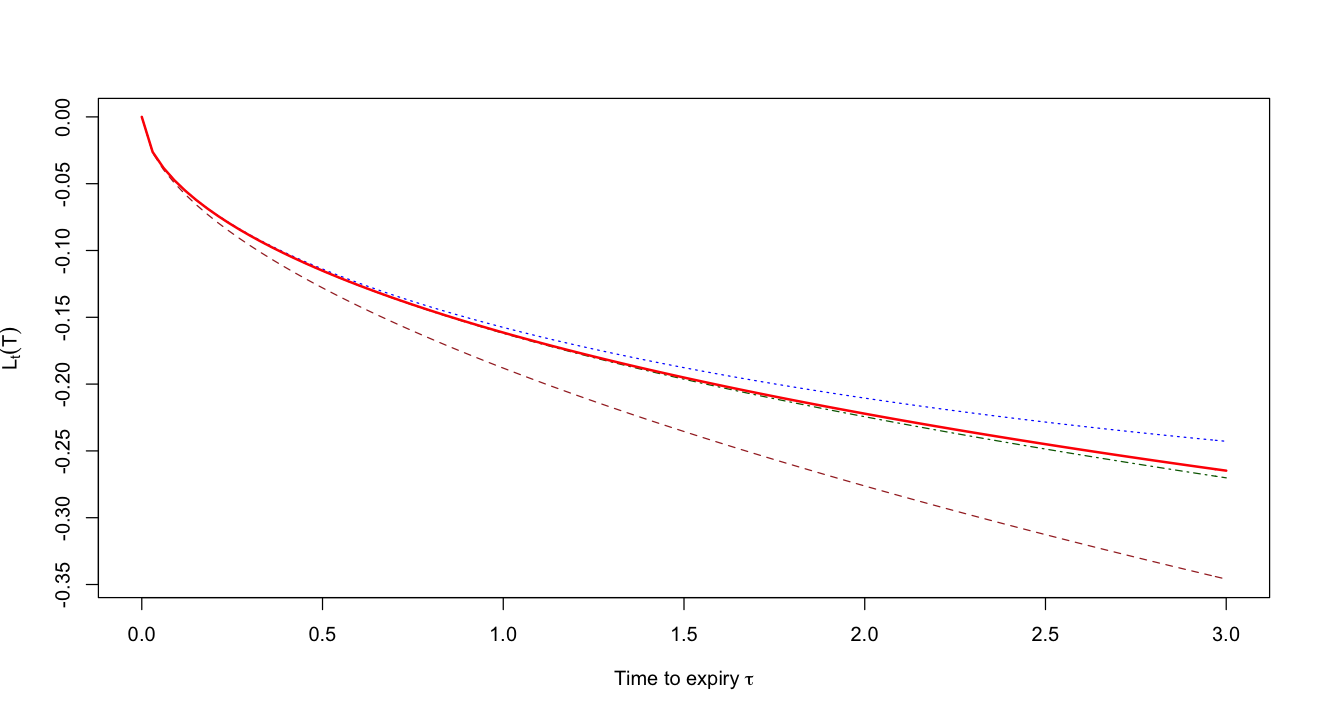

In [34]:
curve(ltT(H.test,nu.test,rho.test,1)(x),from=0,to=3,col="brown",lwd=1,lty=2,
     xlab=expression(paste("Time to expiry ",tau)),ylab=expression(L[t](T)))
curve(ltT(H.test,nu.test,rho.test,2)(x),from=0,to=3,col="blue",lwd=1,lty=3,add=T)
curve(ltT(H.test,nu.test,rho.test,3)(x),from=0,to=3,col="dark green",lwd=1,lty=4,add=T)
curve(ltT(H.test,nu.test,rho.test,20)(x),from=0,to=3,col="red",lwd=2,add=T)

Successive approximations to the (absolute value of) the normalized rough Heston leverage swap.  The solid red line is the exact expression $L_t(T)$; $L_t^{(1)}(T)$, $L_t^{(2)}(T)$, and $L_t^{(3)}(T)$ are brown dashed, blue dotted and dark green dash-dotted lines respectively. 

### Calibration of rough Heston using the leverage swap

In [35]:
vs.Flat <- varSwap.Robust(ivolData,extrapolation="Flat")$vs.mid
gs.Flat <- gammaSwap.Robust(ivolData,extrapolation="Flat")$gs.mid

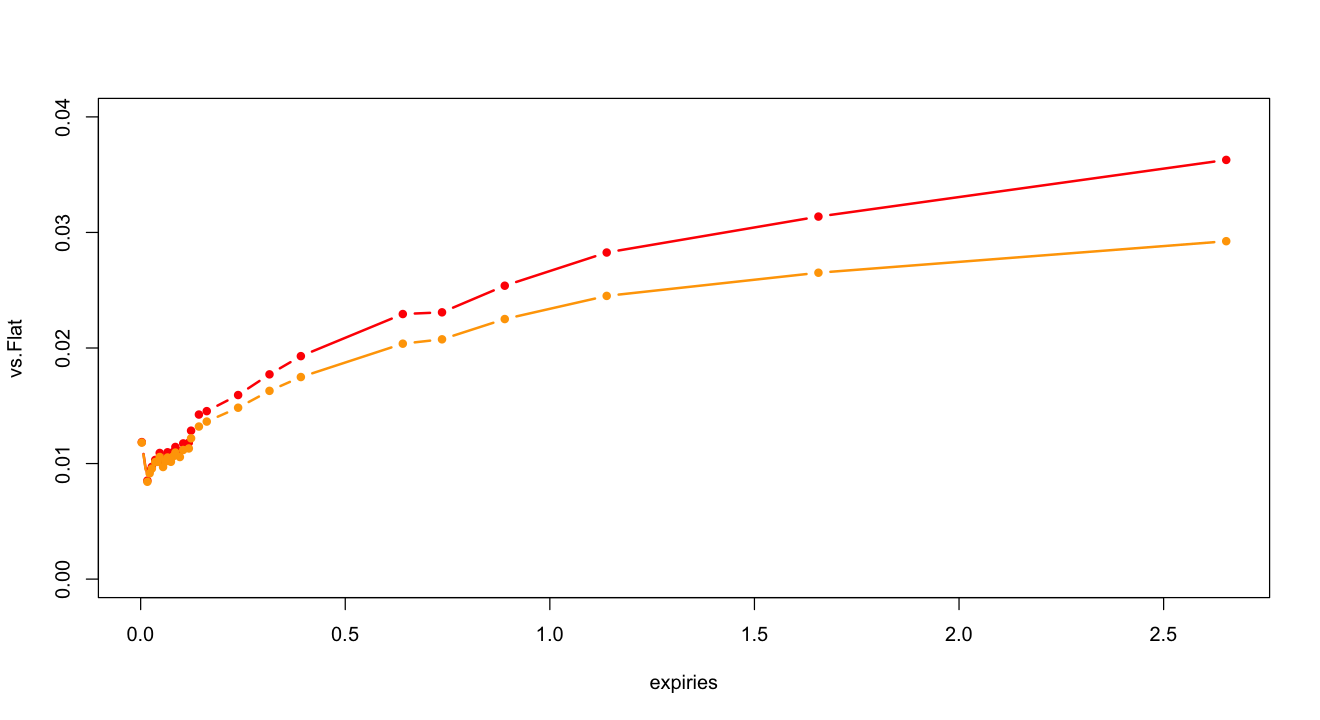

In [36]:
plot(expiries,vs.Flat,col="red",pch=20,type="b",ylim=c(0,0.04),lwd=2)
points(expiries,gs.Flat,col="orange",pch=20,type="b",lwd=2)

Figure 15: Robust estimates of the variance swap (red) and the gamma swap (orange).

### Fukasawa robust leverage swap estimates

In [37]:
(ls.Flat <- gs.Flat - vs.Flat)

[1] -4.364283e-05 -1.040729e-04 -2.105386e-04 -1.510308e-04 -1.799583e-04
 [6] -1.749923e-04 -3.489907e-04 -2.681857e-04 -2.933934e-04 -4.517959e-04
[11] -3.249227e-04 -3.759912e-04 -4.848487e-04 -4.919679e-04 -5.677312e-04
[16] -5.004599e-04 -6.612737e-04 -1.038001e-03 -9.024143e-04 -1.097554e-03
[21] -1.428355e-03 -1.808950e-03 -2.565449e-03 -2.336061e-03 -2.884935e-03
[26] -3.753682e-03 -4.858234e-03 -7.033830e-03

### Plot of normalized leverage swap

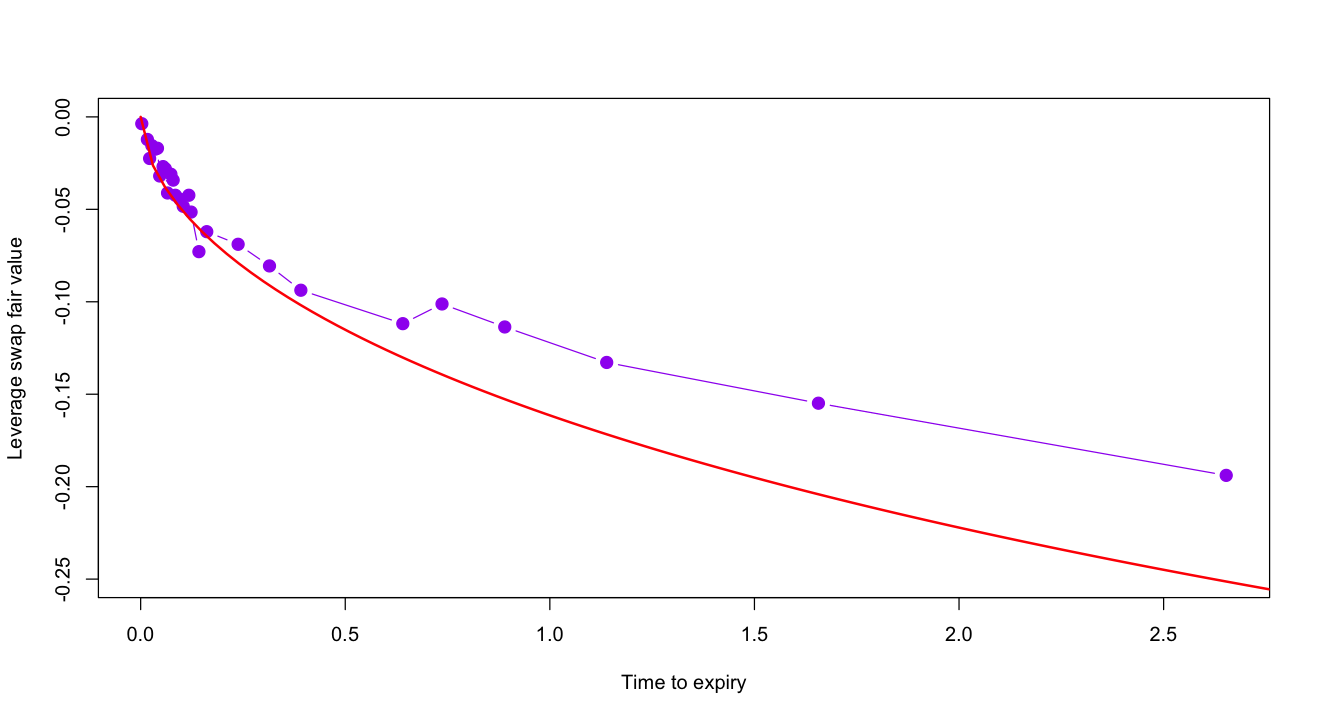

In [38]:
plot(expiries,ls.Flat/vs.Flat,type="b",col="purple",
     pch=20,xlab="Time to expiry",ylab="Leverage swap fair value",cex=2,ylim=c(-.25,0))
curve(ltT(H.test,nu.test,rho.test,20)(x),from=0,to=3,col="red",lwd=2,add=T)

Figure 16: We see that guessed parameters give a pretty good fit for short expirations.

### Rough Heston parameter optimization

In [39]:
l.empirical <- gs.Flat/vs.Flat-1

In [40]:
obj <- function(ivolData)function(params){
    
    paramvec <- as.numeric(params)
    H <- paramvec[1]
    nu <- paramvec[2]
    rho <- paramvec[3]
    
    expiries <- sort(unique(ivolData$Texp))
    
    l.theoretical <- ltT(H,nu,rho,10)(expiries)
    
    res <- sum((l.theoretical - l.empirical)^2/(expiries)^(1))*1e6
    return(res)
}

In [41]:
obj(ivolData)(params.rHeston)

[1] 37414.03

In [42]:
system.time((res <- optim(params.rHeston,obj(ivolData),method="L-BFGS-B",
      lower=c(0.0001,0.01,-1),upper=c(.5,10,1))))

   user  system elapsed 
  0.021   0.000   0.023 

In [43]:
H.opt <- res$par[1]
eta.opt <- res$par[2]
rho.opt <- res$par[3]

The optimized parameters are:

In [44]:
data.frame(H.opt,eta.opt,rho.opt)

,H.opt,eta.opt,rho.opt
H,0.0737022,0.3834606,-0.5803067


### Plot the guessed and optimized leverage swap fits

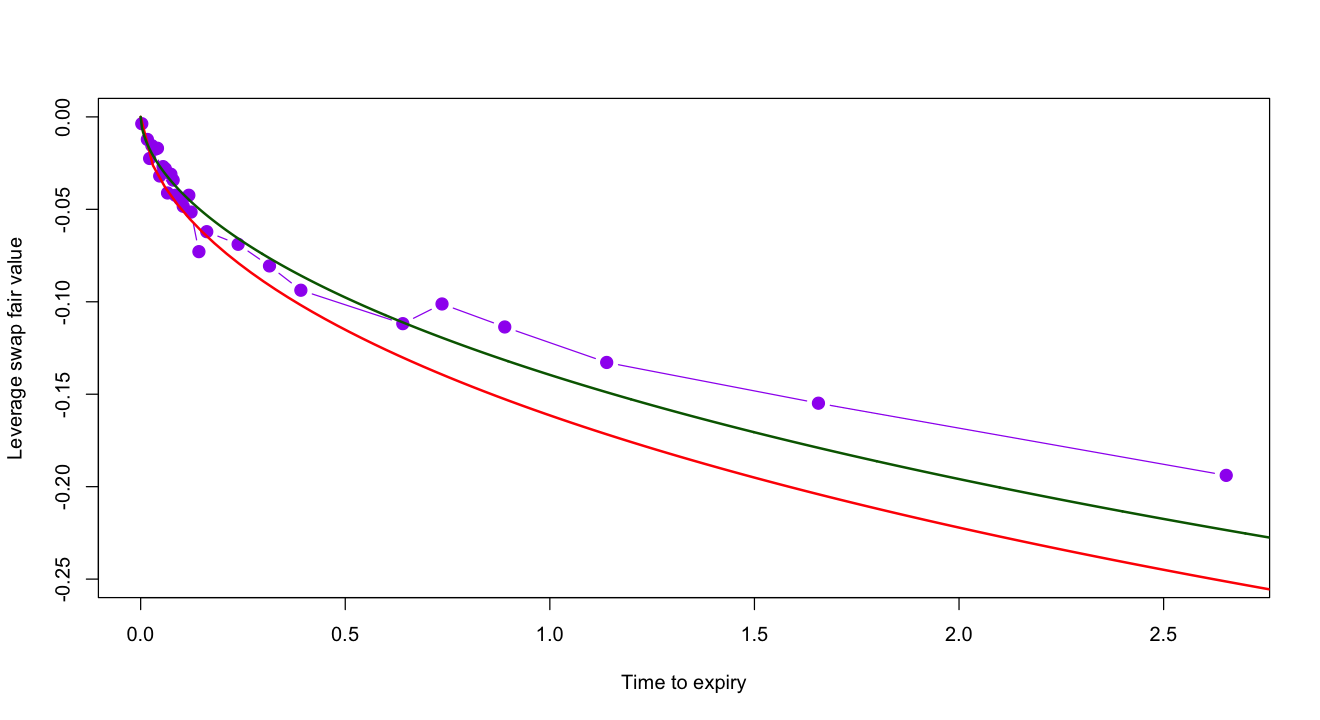

In [45]:
plot(expiries,l.empirical,type="b",col="purple",cex=2,ylim=c(-.25,0),
     pch=20,xlab="Time to expiry",ylab="Leverage swap fair value")
curve(ltT(0.055,.4,-.65,10)(x),from=0,to=3,col="red",lwd=2,add=T)
curve(ltT(H.opt,eta.opt,rho.opt,10)(x),from=0,to=3,col="dark green",lwd=2,add=T,n=1000)

Figure 17: Leverage swap fit with guessed parameters in red, with optimized parameters in green.

### Changing the weighting in the objective function

- The above fit weighted differences between empirical and model leverage by $\tau^{-1}$.


- Experimenting with different weighting functions gives
    - $\tau^{-1}$:  $H=0.074$, $\nu = 0.383$, $\rho=-0.580$
    - $\tau^{-1/2}$:  $H=0.024$, $\nu = 0.361$, $\rho=-0.548$
    - $\tau^{-3/2}$:  $H=0.138$, $\nu = 0.419$, $\rho=-0.651$.
    
    
- We might get better results with better extrapolation of empirical smiles.
    - Still work in progress.

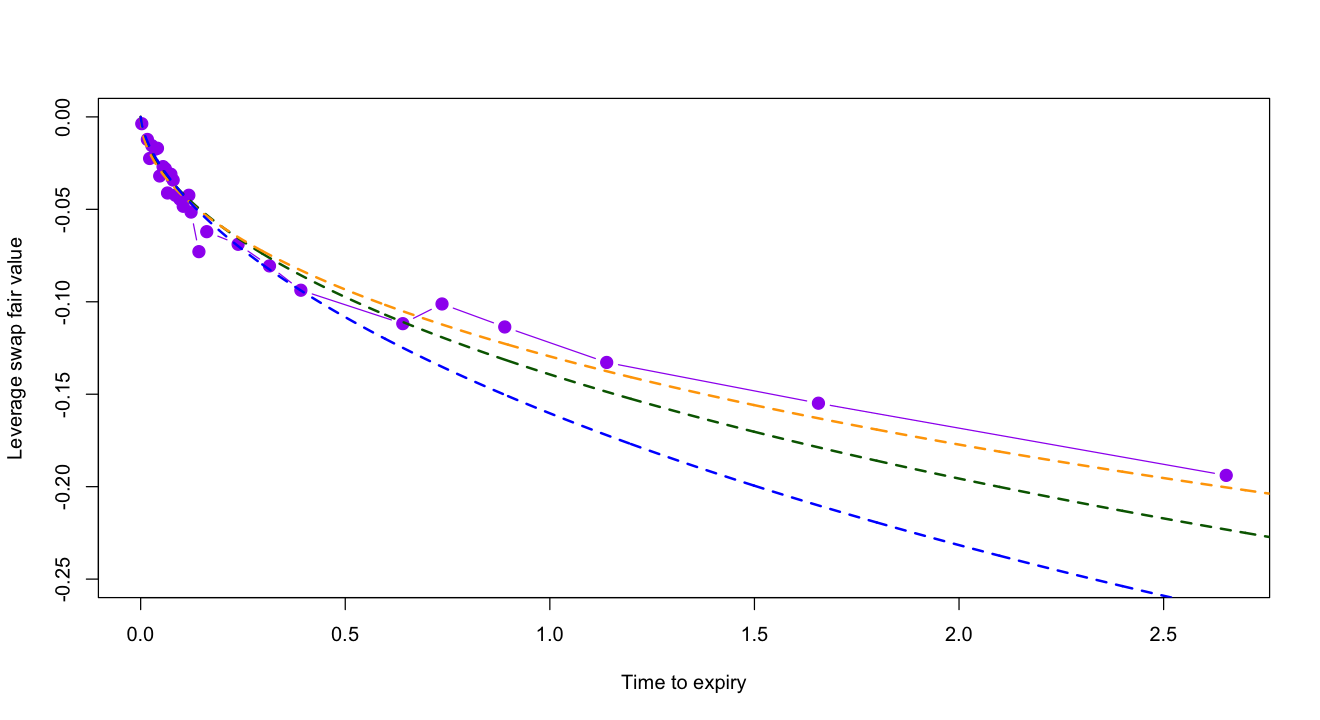

In [46]:
plot(expiries,l.empirical,type="b",col="purple",cex=2,ylim=c(-.25,0),
     pch=20,xlab="Time to expiry",ylab="Leverage swap fair value")
curve(ltT(0.074,0.383,-0.58,10)(x),from=0,to=3,col="dark green",lwd=2,lty=2,add=T,n=1000)
curve(ltT(0.024,.361,-.548,10)(x),from=0,to=3,col="orange",lwd=2,lty=2,add=T,n=1000)
curve(ltT(0.138,.419,-.651,10)(x),from=0,to=3,col="blue",lwd=2,lty=2,add=T,n=1000)

Figure 18: Fits for different weightings in the objective function: $\tau^{-1}$ in green, $\tau^{-1/2}$ in orange, $\tau^{-3/2}$ in blue. 

### Compare with classical Heston fits

- The parameters of the rough Heston fit depend on the weighting in the objective function.


- Is the rough Heston fit better than the classical Heston fit?


- Let's see!

In [47]:
params.Heston <- list(v=0.04,vbar=0.04,eta=.5,rho=-.7,lambda=2)
params.Heston2 <- list(v=0.04,vbar=0.04,eta=1.0,rho=-.7,lambda=2)

In [48]:
obj.classical <- function(paramvec){
    
    lambda<- paramvec[1]
    eta <- paramvec[2]
    rho <- paramvec[3]
    
    expiries <- sort(unique(ivolData$Texp))
    params <- list(v=0.04,vbar=0.04,eta=eta,rho=rho,lambda=lambda)
    
    l.theoretical <- normalizedLeverageHeston(params)(expiries)
    
    res <- sum((l.theoretical - l.empirical)^2/(expiries)^0)*1e6
    return(res)
}

In [49]:
system.time((res <- optim(c(1,1,-.7),obj.classical,method="L-BFGS-B",
      lower=c(0.0001,0.01,-1),upper=c(100,10,1))))

   user  system elapsed 
  0.011   0.000   0.011 

In [50]:
res$par

[1]  4.7718462  1.1136849 -0.8534054

In [51]:
lambda.opt.classical <- res$par[1]
eta.opt.classical <- res$par[2]
rho.opt.classical <- res$par[3]

In [52]:
params.classical <- list(v=0.02,vbar=0.02,eta=eta.opt.classical,rho=rho.opt.classical,
                         lambda=lambda.opt.classical)

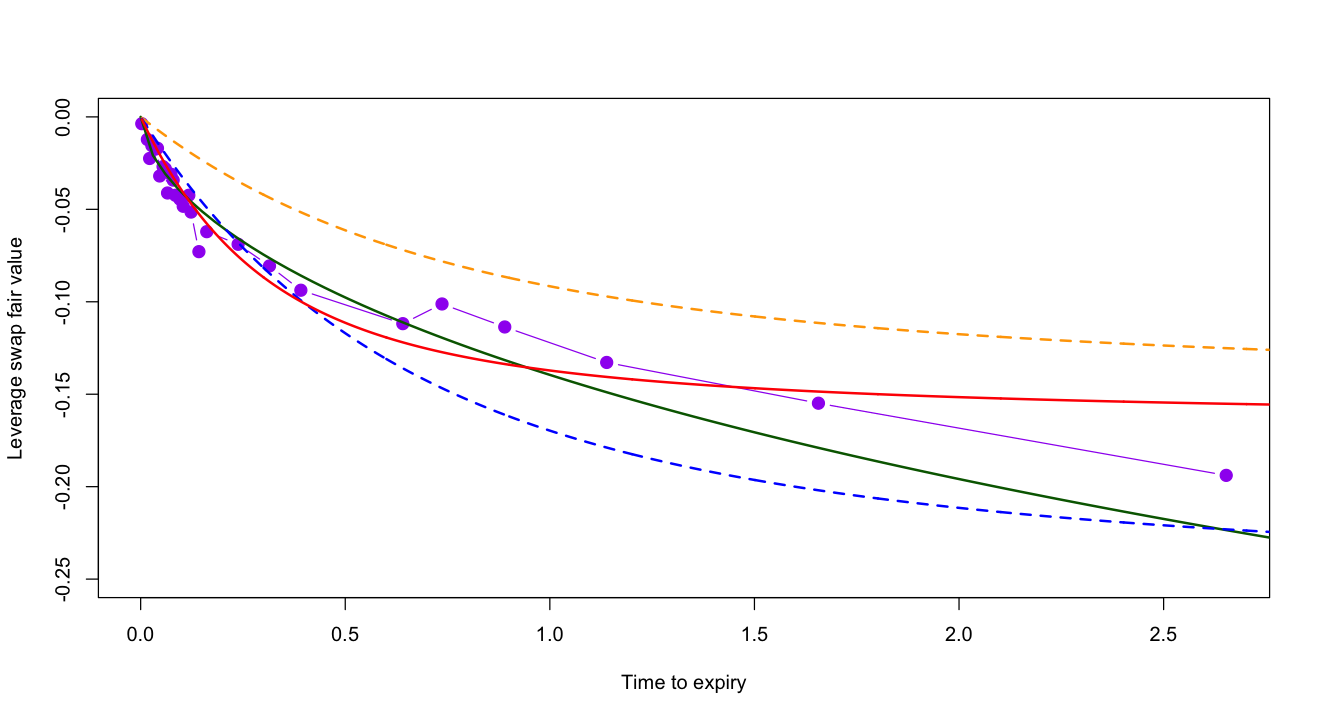

In [53]:
plot(expiries,l.empirical,type="b",col="purple",ylim=c(-.25,0),
     pch=20,cex=2,xlab="Time to expiry",ylab="Leverage swap fair value")
#curve(ltT(0.1216,.2910,-.6714,10)(x),from=0,to=3,col="red",lwd=2,add=T)
curve(ltT(H.opt,eta.opt,rho.opt,10)(x),from=0,to=3,col="dark green",lwd=2,add=T)
curve(normalizedLeverageHeston(params.Heston)(x),from=0,to=3,col="orange",lwd=2,lty=2,add=T,n=1000)
curve(normalizedLeverageHeston(params.Heston2)(x),from=0,to=3,col="blue",lwd=2,add=T,lty=2,n=1000)
curve(normalizedLeverageHeston(params.classical)(x),from=0,to=3,col="red",lwd=2,add=T,n=1000)

Figure 19:  Even if rough Heston parameters depend on the choice of objective function, rough Heston still fits better than classical Heston!

### The rough Bergomi model again

Recall yet again that in the rBergomi model,

$$
\beas
\frac{dS_t}{S_t} &=& \sqrt{\xi_t(t)}\,dZ_t\\
\frac{d\xi_t(u)}{\xi_t(u)} &=& \tilde \eta \,\frac{dW_t}{(u-t)^\gamma}
\eeas
$$

where $\gamma = \frac 12 - H$ and $\tilde \eta = \eta\,\sqrt{2\,H}$.  

Thus

$$
\beas
dX_t &=& \sqrt{\xi_t(t)}\,dZ_t + \text{drift}\\
dM_t &=& \int_t^T\,d\xi_t(u)\,du  = \tilde \eta \,\left(\int_t^T\,\frac{\xi_t(u)}{(u-t)^\gamma}\,du\right)\,dW_t.
\eeas
$$

### Forest computations under rough Bergomi

Explicit computation of $\mF_1$ gives

$$
\beas
(X \dm M )_t &=& \eef{\int_t^T d\angl{X,M}_s}\\
&=& \rho\,\tilde \eta\,\int_t^T\,ds\,\int_s^T\,\eef{\sqrt{\xi_s(s)}\,\xi_s(u)}\,\frac{du}{(u-s)^\gamma}.
\eeas
$$

This stands in contrast to the rough Heston model where 

$$
(X \dm M)_t =
\frac{\rho\,\nu}{\Gamma(1+\alpha)} \,\int_t^T \,\xi_t(s) \,(T-s)^\alpha\,ds
$$

*exactly* with no higher order contributions.  

- Our forest expansion and the Bergomi-Guyon volatility of volatility expansion are not in general identical.
    -Though they are in the special case of the rough Heston model.


-  Terms such as $\eef{\sqrt{\xi_s(s)}\,\xi_s(u)}$ are not impossible to compute but are not easy either.


-  Bergomi and Guyon approximate this term by freezing:
$$
\eef{\sqrt{\xi_s(s)}\,\xi_s(u)} \approx \sqrt{\xi_t(s)}\,\xi_t(u) .
$$

 
-  Approximating the leverage swap for the rough Bergomi model is work in progress.
 

### Summary

-  Efficient calibration of rough volatility models to the volatility surface is now within reach.


- We can just guess the parameters $H$, $\eta$ and $\rho$ of the rough Bergomi model or use VIX futures to fix $H$ and calibrate the other two parameters.


- We can calibrate the parameters of the rough Heston model using leverage swaps.
    -  We may equate leverage swaps estimated from the market with model leverage computed using the exact formula.
    
    
- In either case, we have as many matching conditions as market option expirations.
    
    
- The hope is that we may develop such techniques further to efficiently calibrate even quite complicated models.
 

### References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

<li id="cite_note-Alos"><span class="mw-cite-backlink"><b><a href="#cite_ref-Alos">^</a></b></span>
Elisa Alòs, A decomposition formula for option prices in the Heston model and applications to option pricing approximation, *Finance and stochastics* **16**(3) 403-422 (2012).</li>
</li>

<li id="cite_note-AGR"><span class="mw-cite-backlink"><b><a href="#cite_ref-AGR">^</a></b></span>
Elisa Alòs, Jim Gatheral, and Radoš Radoičić, Exponentiation of conditional expectations under stochastic volatility, available at https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2983180, (2017).</li>
</li>


<li id="cite_note-BFG"><span class="mw-cite-backlink"><b><a href="#cite_ref-BFG">^</a></b></span> 
Christian Bayer, Peter Friz and Jim Gatheral, Pricing under rough volatility, *Quantitative Finance* **16**(6) 887-904 (2016).
</li>
 
 
<li id="cite_note-BLP"><span class="mw-cite-backlink"><b><a href="#cite_ref-BLP">^</a></b></span>
Mikkel Bennedsen, Asger Lunde, and Mikko S. Pakkanen, Hybrid scheme for Brownian semistationary processes, *Finance and Stochastics*, forthcoming (2017).</li>


<li id="cite_note-EER"><span class="mw-cite-backlink"><b><a href="#cite_ref-EER">^</a></b></span> 
Omar El Euch and Mathieu Rosenbaum, The characteristic function of rough Heston models, available at https://arxiv.org/abs/1609.02108, (2016).</li>

<li id="cite_note-Fukasawa"><span class="mw-cite-backlink"><b><a href="#cite_ref-Fukasawa">^</a></b></span> 
Masaaki Fukasawa, Volatility Derivatives and Model-Free Implied Leverage, *International Journal of Theoretical and Applied Finance* **17**(1) 1450002  (2014).</li>



<li id="cite_note-FukasawaEtAl"><span class="mw-cite-backlink"><b><a href="#cite_ref-FukasawaEtAl">^</a></b></span> 
Masaaki Fukasawa, I Ishida, N Maghrebi, K Oya, M Ubukata, and K Yamazaki. “Model-free implied volatility: From surface to index, *International Journal of Theoretical and Applied Finance* **14**(4) 433-463  (2010).</li>




 

</ol>
  


 